# Surprise Housing

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Data understanding 

In [1]:
#importing the required libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to display all columns 
pd.set_option('display.max_columns',None)
#reading the dataset
house = pd.read_csv('train.csv')

In [4]:
#head
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#summary of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 2. Data Cleaning and manipulation

In [6]:
# dropping the column Id as it is not helpful
house.drop(['Id'],axis = 1,inplace=True)

In [7]:
# missing value percentage in columns with missing values
missing = house.isnull().sum()/len(house)*100
missing[missing>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

#### Although there seems to be a lot of columns with missing values, from the data dictionary it is clear that NA is a seperate category and not null value. The other columns with missing values,  'MasVnrArea' and 'GarageYrBlt' lack those particular features. 'LotFrontage' and 'Electrical' are the only columns with actual missing values

#### Dropping those columns where the missing values are more than 90% as they do not contain much information

In [8]:
house.drop(['Alley','PoolQC','MiscFeature'],axis = 1,inplace=True)

In [9]:
# substituting the null values in the float columns with '0' and coverting it to float
house.fillna({'MasVnrArea':'0','GarageYrBlt':'0'}, inplace = True)
house[['MasVnrArea','GarageYrBlt']] = house[['MasVnrArea','GarageYrBlt']].astype(float)
# substituting the null values in the columns whose datatype is 'object' with 'None' as those particular features are not applicable
str_cols = house.columns[house.dtypes==object]
house[str_cols] = house[str_cols].fillna('None')

In [10]:
# since the missing 'Electrical' values percentage is very small, removing those rows where 'Electrical' is null
house = house[~house['Electrical'].isnull()]

In [11]:
# finding out the median of the column 'LotFrontage' so that it can be substituted for the null values
house['LotFrontage'].median()

69.0

In [12]:
# substituting the null values with the median
house['LotFrontage'].fillna('69', inplace = True)
# converting the column 'LotFrontage' to type float
house['LotFrontage'] = house['LotFrontage'].astype(float)

In [13]:
# getting the info to find out the data type of columns and to check if there are any more null values
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

#### Deriving new variables, house_age, garage_age, sold_age and remod_age

In [14]:
# importing datetime to get the current date
import datetime
today = datetime.datetime.now()
#subtracting the columns where year exists, from the current year to get the ages
house['house_age'] = today.year - house['YearBuilt']
house['sold_age'] = today.year - house['YrSold']
house['garage_age'] = house['GarageYrBlt'].where(house['GarageYrBlt'] == 0, today.year - house['GarageYrBlt'])
house['remod_age'] = house['YearRemodAdd'].where(house['YearRemodAdd'] == 0, today.year - house['YearRemodAdd'])
#dropping the columns from which the new columns were derived
house.drop(['YearBuilt','GarageYrBlt','YrSold','YearRemodAdd'],axis = 1,inplace=True)

In [15]:
# to get an idea about the numerical columns of the dataset
house.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.117123   443.639726    46.549315   567.240411  1057.429452   
std     180.731373   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     164.250000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000

### 3. Data visualisation 

In [16]:
# creating a dataframe 'house_num' containing only the numeric columns
house_num = house.select_dtypes(include=['float64', 'int64'])
#removing the below columns as they contain categorical values
house_num.drop(['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold'],axis = 1,inplace = True)
house_num.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  house_age  sold_age  garage_age  remod_age  
0        0     208500         17        12        17.0         17  
1        0     181500         44        13        44.0         44  
2        0     223500         19        12        19.0         18  
3        0     140000        105        14        22.0         50  
4        0     250000         20        12        20.0         20

In [17]:
# size of house_num
house_num.shape

(1460, 24)

In [18]:
# Describing the numerical columns to find out which of the columns have 0 as their min value
house_num.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  \
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000   
mean      3.409589    15.060959     2.758904     43.489041  180921.195890   
std      29.317331    55.757415    40.177307    496.123024   79442.502883   
min       0.000000     0.000000     0.000000      0.000000   34900.000000   
25%       0.000000     0.000000     0.000000      0.000000  129975.000000   
50%       0.000000     0.000000     0.000000      0.000000  163000.000000   
75%       0.000000     0.000000     0.000000      0.000000  214000.000000   
max     508.000000   480.000000   738.000000  15500.000000  755000.000000   

         house_age     sold_age   garage_age    remod_age  
count  1460.000000  1460.000000  1460.000000  1460.000000  
mean     48.732192    12.184247    39.191781    35.134247  
std      30.202904     1.328095    25.807431    20.645407  
min      10.000000    10.000000     0.000000    10.000000  
25%      20.000000    11.000000    17.000000    16.000000  
50%      47.000000    12.000000    35.500000    26.000000  
75%      66.000000    13.000000    58.000000    53.000000  
max     148.000000    14.000000   120.000000    70.000000

#### From the above table it is clear that the columns with 0 as the min value are MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea and MiscVal

In [19]:
#Finding out the percentage of zeros in the columns with zeros
for c in ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','LowQualFinSF','GarageArea',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']:
    print(c)
    print(house_num[c].value_counts()[0]/len(house)*100)

MasVnrArea
59.52054794520548
BsmtFinSF1
31.986301369863014
BsmtFinSF2
88.56164383561645
BsmtUnfSF
8.082191780821917
TotalBsmtSF
2.5342465753424657
2ndFlrSF
56.780821917808225
LowQualFinSF
98.21917808219179
GarageArea
5.5479452054794525
WoodDeckSF
52.12328767123287
OpenPorchSF
44.93150684931507
EnclosedPorch
85.75342465753425
3SsnPorch
98.35616438356163
ScreenPorch
92.05479452054794
PoolArea
99.52054794520548
MiscVal
96.43835616438356


#### Clearly the columns LowQualFinSF, 3SsnPorch, ScreenPorch, PoolArea and MiscVal have more than 90% of their values as zero, which means they are not contributing much information. Hence dropping these columns

In [20]:
house.drop(['LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis = 1,inplace=True)
house_num.drop(['LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis = 1,inplace=True)

In [21]:
house_num.shape

(1460, 19)

#### Plotting the disribution plots and boxplots for all the numerical columns

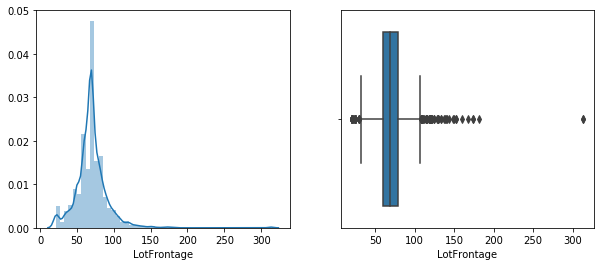

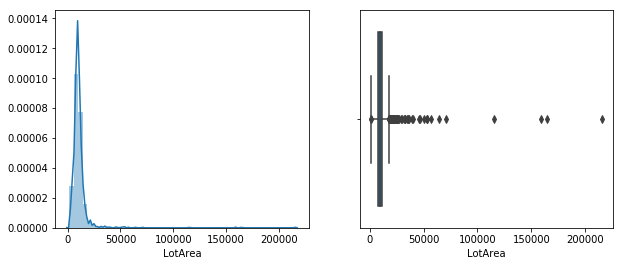

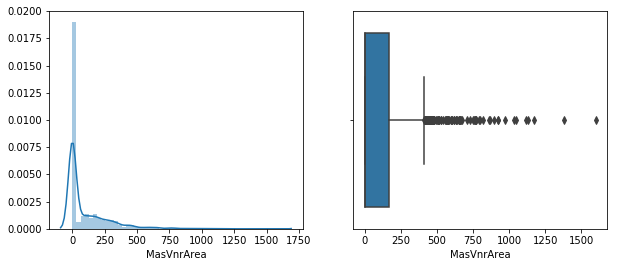

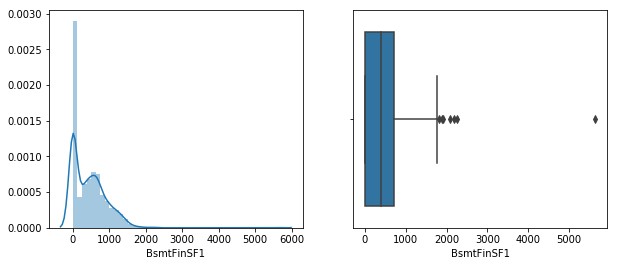

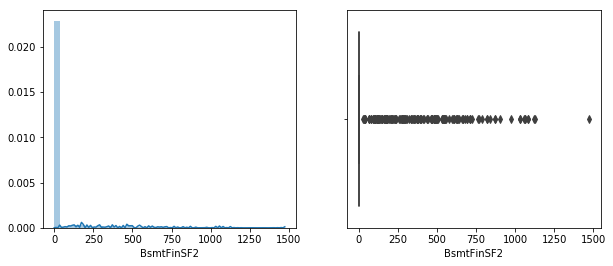

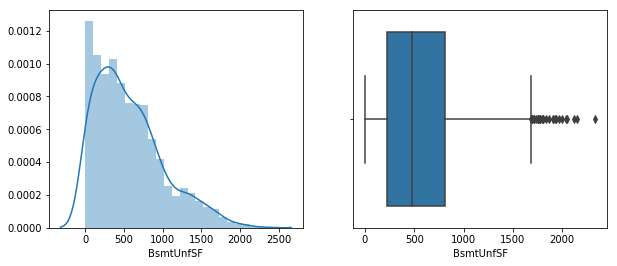

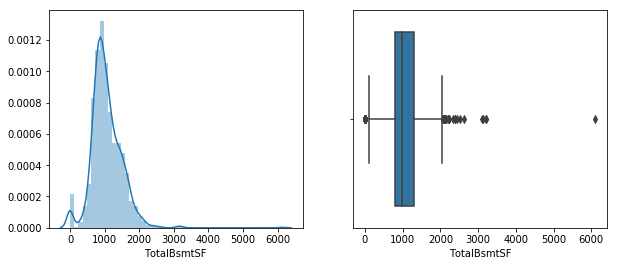

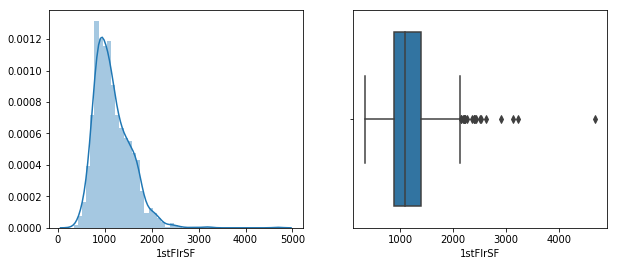

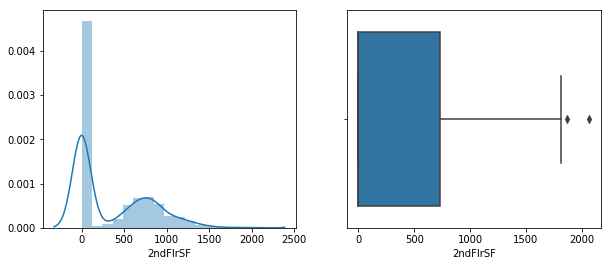

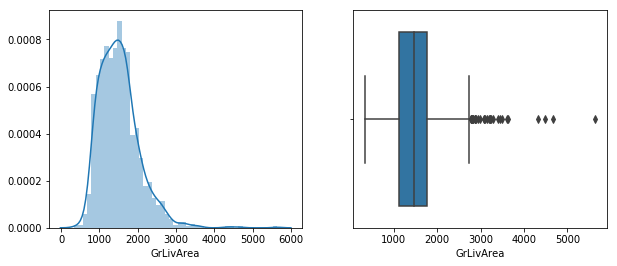

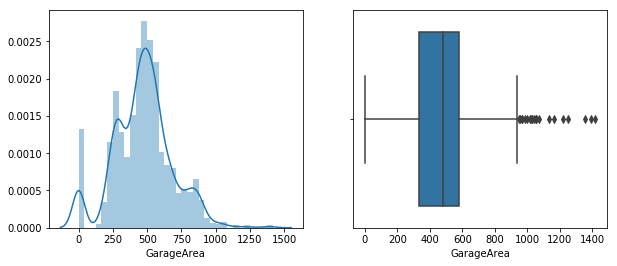

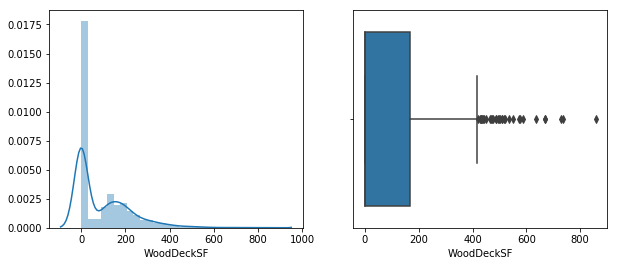

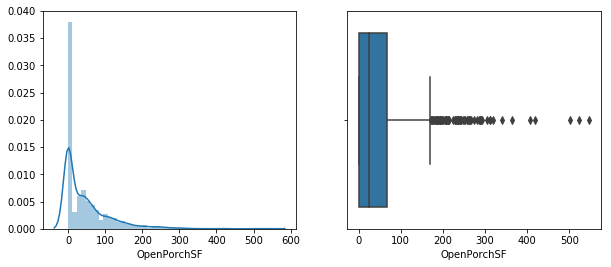

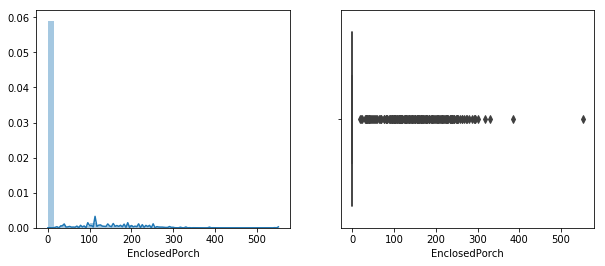

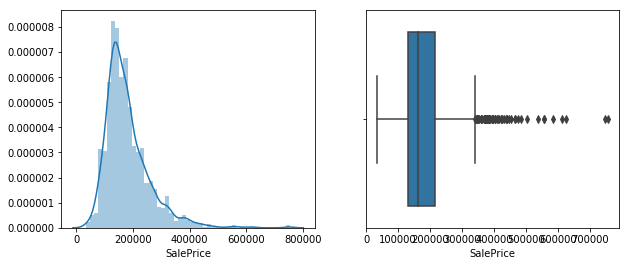

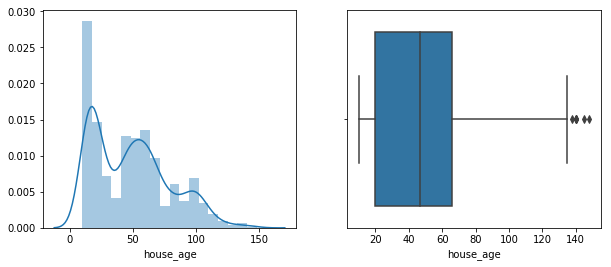

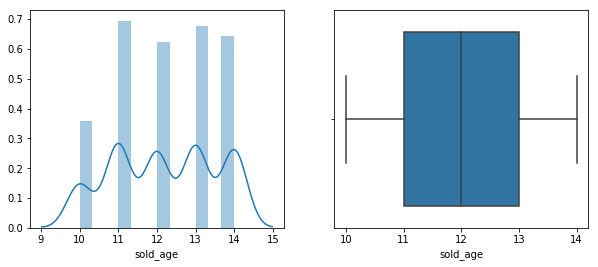

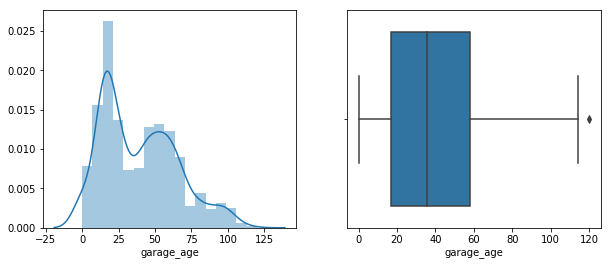

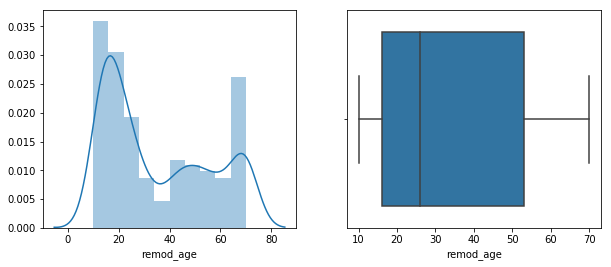

In [22]:
for c in house_num.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(house_num[c])
    plt.subplot(1, 2, 2)
    sns.boxplot(house_num[c])
    plt.show()

#### Although there seems to be some numerical columns with outliers, they will be treated by scaling before building the model

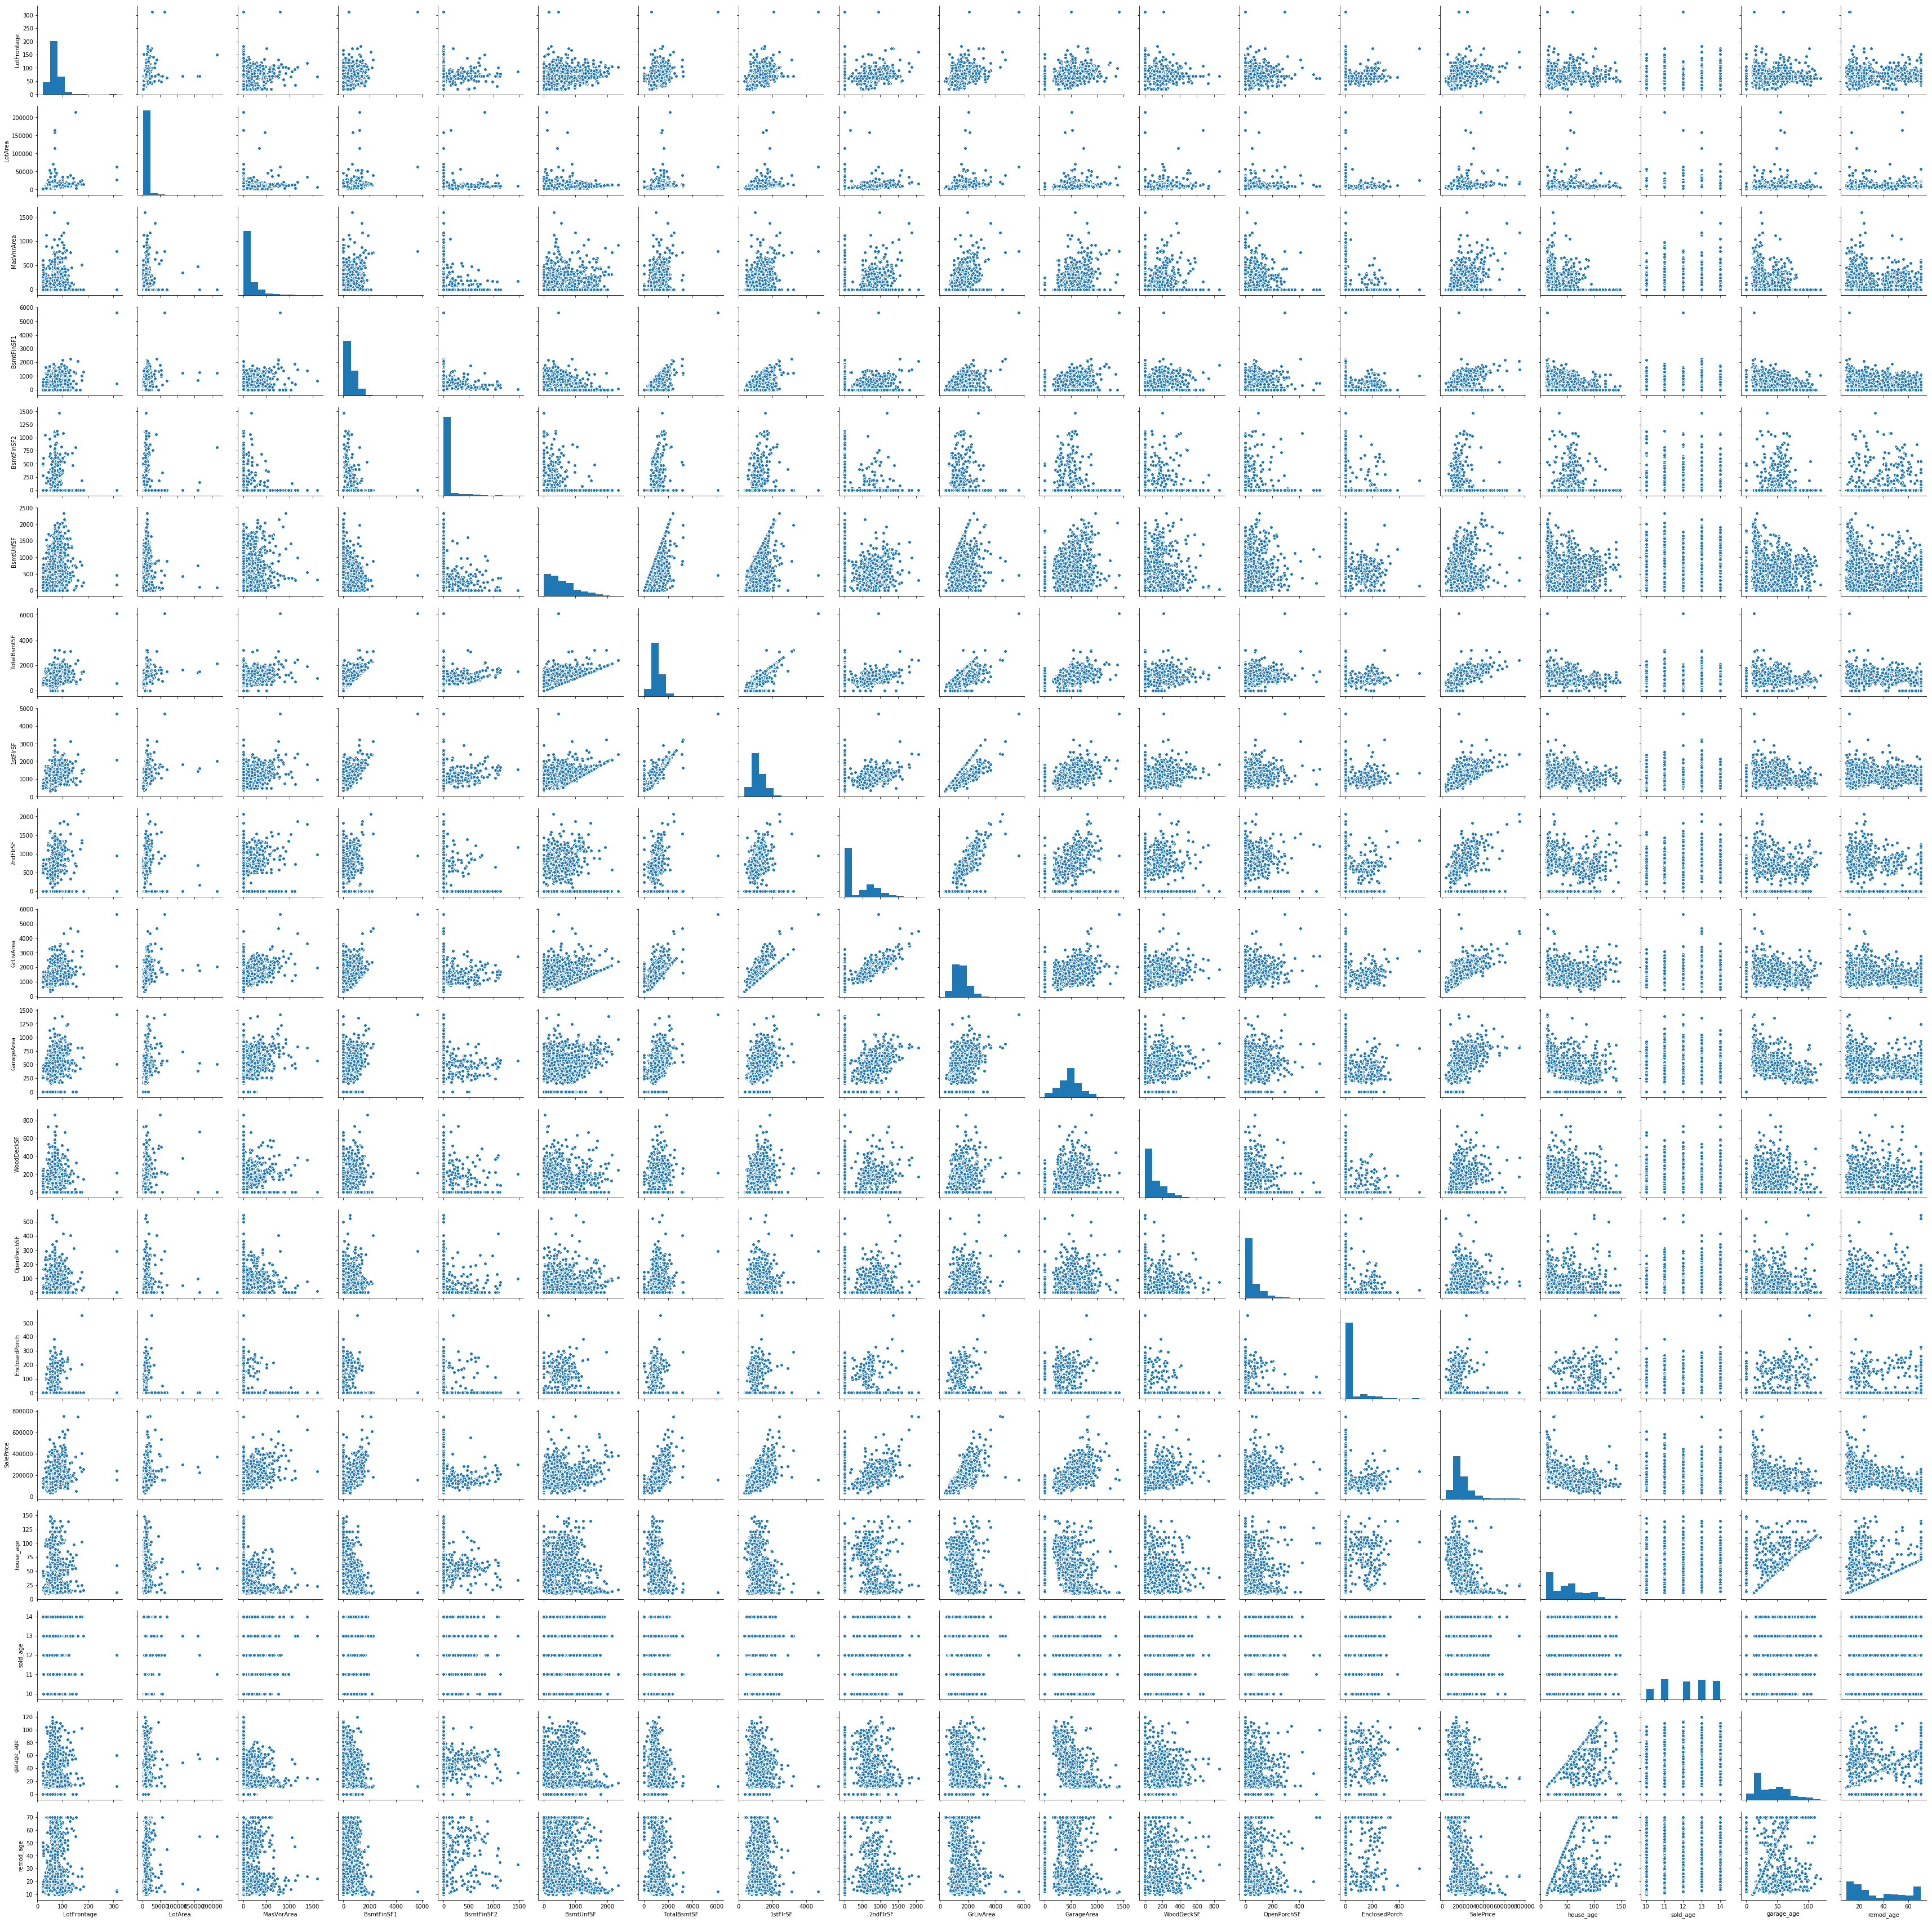

In [23]:
# plotting the pairplot of the numerical columns 
sns.pairplot(house_num)
plt.show()

In [24]:
# correlation matrix
cor = house_num.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.304522    0.178469    0.214367    0.042463   
LotArea           0.304522  1.000000    0.103321    0.214103    0.111170   
MasVnrArea        0.178469  0.103321    1.000000    0.261256   -0.071330   
BsmtFinSF1        0.214367  0.214103    0.261256    1.000000   -0.050117   
BsmtFinSF2        0.042463  0.111170   -0.071330   -0.050117    1.000000   
BsmtUnfSF         0.124098 -0.002618    0.113862   -0.495251   -0.209294   
TotalBsmtSF       0.363472  0.260833    0.360067    0.522396    0.104810   
1stFlrSF          0.413773  0.299475    0.339850    0.445863    0.097117   
2ndFlrSF          0.072388  0.050986    0.173800   -0.137079   -0.099260   
GrLivArea         0.368007  0.263116    0.388052    0.208171   -0.009640   
GarageArea        0.323511  0.180403    0.370884    0.296970   -0.018227   
WoodDeckSF        0.075542  0.171698    0.159991    0.204306    0.067898   
OpenPorchSF       0.137014  0.084774    0.122528    0.111761    0.003093   
EnclosedPorch     0.010287 -0.018340   -0.109907   -0.102303    0.036543   
SalePrice         0.334771  0.263843    0.472614    0.386420   -0.011378   
house_age        -0.116685 -0.014228   -0.311600   -0.249503    0.049107   
sold_age         -0.006380  0.014261    0.008317   -0.014359   -0.031706   
garage_age       -0.024531  0.050320   -0.184760   -0.099998    0.095635   
remod_age        -0.083348 -0.013788   -0.176529   -0.128451    0.067759   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
LotFrontage     0.124098     0.363472  0.413773  0.072388   0.368007   
LotArea        -0.002618     0.260833  0.299475  0.050986   0.263116   
MasVnrArea      0.113862     0.360067  0.339850  0.173800   0.388052   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079   0.208171   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260  -0.009640   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469   0.240257   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512   0.454868   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646   0.566024   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000   0.687501   
GrLivArea       0.240257     0.454868  0.566024  0.687501   1.000000   
GarageArea      0.183303     0.486665  0.489782  0.138347   0.468997   
WoodDeckSF     -0.005316     0.232019  0.235459  0.092165   0.247433   
OpenPorchSF     0.129005     0.247264  0.211671  0.208026   0.330224   
EnclosedPorch  -0.002538    -0.095478 -0.065292  0.061989   0.009113   
SalePrice       0.214479     0.613581  0.605852  0.319334   0.708624   
house_age      -0.149040    -0.391452 -0.281986 -0.010308  -0.199010   
sold_age        0.041258     0.014969  0.013604  0.028700   0.036526   
garage_age     -0.160904    -0.230860 -0.154161 -0.042053  -0.150783   
remod_age      -0.181133    -0.291066 -0.240379 -0.140024  -0.287389   

               GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  \
LotFrontage      0.323511    0.075542     0.137014       0.010287   0.334771   
LotArea          0.180403    0.171698     0.084774      -0.018340   0.263843   
MasVnrArea       0.370884    0.159991     0.122528      -0.109907   0.472614   
BsmtFinSF1       0.296970    0.204306     0.111761      -0.102303   0.386420   
BsmtFinSF2      -0.018227    0.067898     0.003093       0.036543  -0.011378   
BsmtUnfSF        0.183303   -0.005316     0.129005      -0.002538   0.214479   
TotalBsmtSF      0.486665    0.232019     0.247264      -0.095478   0.613581   
1stFlrSF         0.489782    0.235459     0.211671      -0.065292   0.605852   
2ndFlrSF         0.138347    0.092165     0.208026       0.061989   0.319334   
GrLivArea        0.468997    0.247433     0.330224       0.009113   0.708624   
GarageArea       1.000000    0.224666     0.241435      -0.121777   0.623431   
WoodDeckSF       0.224666    1.000000     0.058661      -0.125989   0.324413   
OpenPorchSF  

##### Since the pairplots are hard to read plotting the heatmap

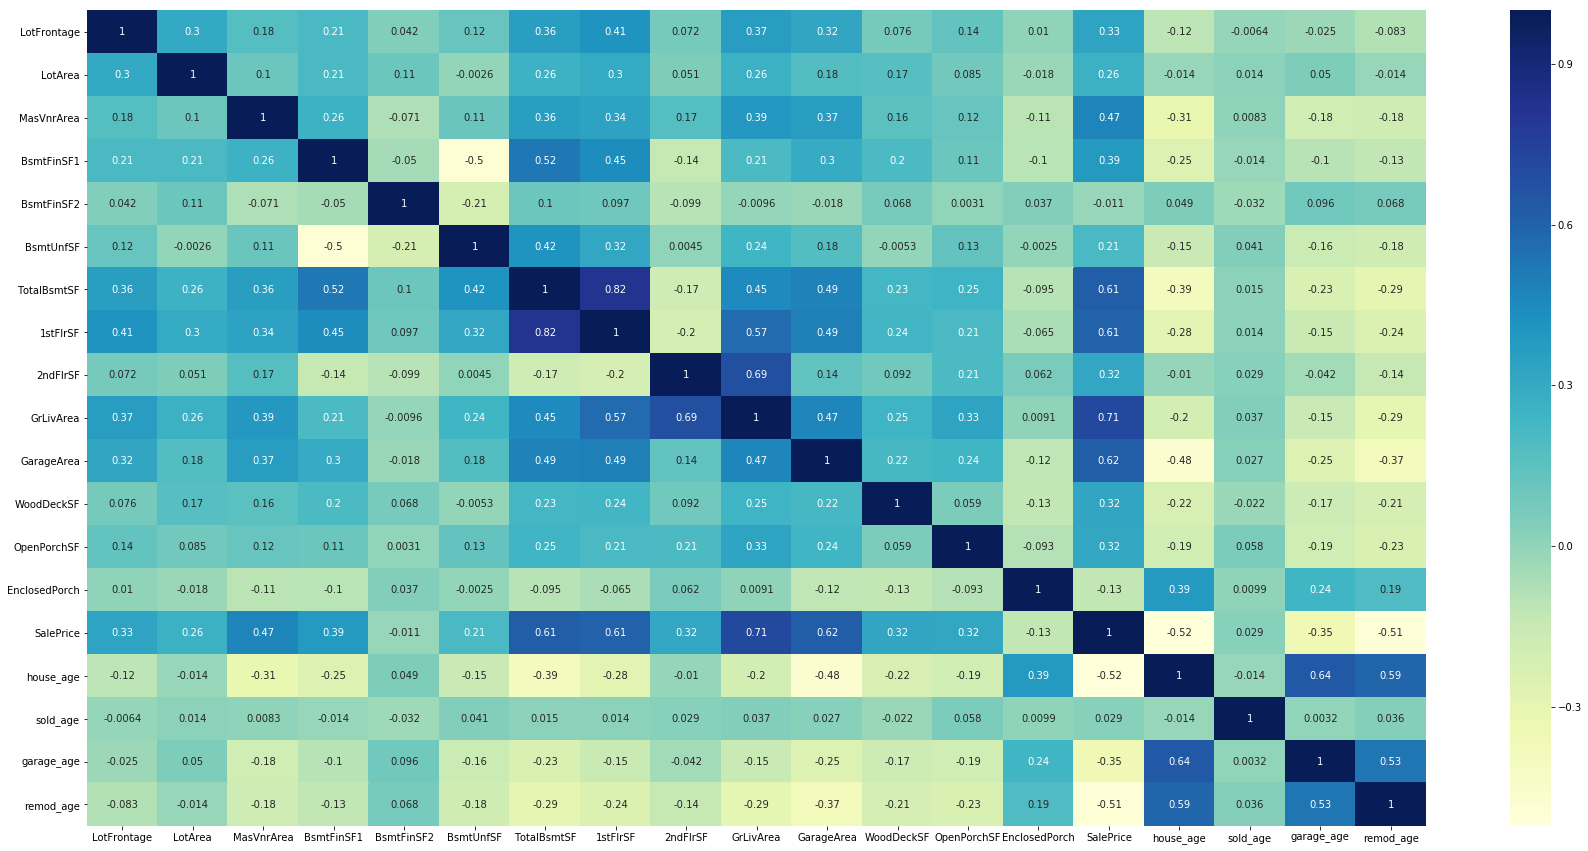

In [25]:
# heatmap of the numerical columns
plt.figure(figsize=(30, 15))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [26]:
# creating a dataframe 'house_cat' containing all the columns not included in house_num
house_cat = house.drop(house_num.columns,axis = 1)
house_cat.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0          60       RL   Pave      Reg         Lvl    AllPub    Inside   
1          20       RL   Pave      Reg         Lvl    AllPub       FR2   
2          60       RL   Pave      IR1         Lvl    AllPub    Inside   
3          70       RL   Pave      IR1         Lvl    AllPub    Corner   
4          60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9        Typ           1          TA     Attchd   

  GarageFinish  GarageCars GarageQual GarageCond PavedDrive Fence  MoSold  \
0          RFn           2         TA         TA          Y  None       2   
1          RFn           2         TA         TA          Y  None       5   
2          RFn           2         TA         TA          Y  None       9   
3          Unf           3         TA         TA          Y  None       2   
4          RFn           3         TA         TA          Y  None      12   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [27]:
# size of house_cat
house_cat.shape

(1460, 53)

In [28]:
#converting all the columns to type string so that can be converted to dummy variables
house_cat = house_cat.astype(str)
house_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 53 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         14

In [29]:
#finding out the value counts of the categorical columns to see the distribution of values
for c in house_cat:
    print('*****',c,'*****')
    print(house_cat[c].value_counts()/len(house)*100)

***** MSSubClass *****
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
***** MSZoning *****
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
***** Street *****
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
***** LotShape *****
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
***** LandContour *****
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
***** Utilities *****
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
***** LotConfig *****
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR

#### From the value counts of the categorical columns, it is evident that the columns Street,LandContour,Utilities,LandSlope,Condition2,RoofMat1,BsmtCond,Heating,CentralAir,Electrical,BsmtHalfBath, KitchenAbvGr, Functional, GarageQual, GarageCond and  PavedDrive have around 90% and above as the same value. As a result they do not provide meaningful info. Hence dropping them from the datasets house_cat and house

In [30]:
house.drop(['Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir',
            'Electrical','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive'],axis = 1,inplace=True)
house_cat.drop(['Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir',
            'Electrical','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive'],axis = 1,inplace=True)

In [31]:
house_cat.shape

(1460, 37)

In [32]:
house_cat.head()

MSSubClass MSZoning LotShape LotConfig Neighborhood Condition1 BldgType  \
0         60       RL      Reg    Inside      CollgCr       Norm     1Fam   
1         20       RL      Reg       FR2      Veenker      Feedr     1Fam   
2         60       RL      IR1    Inside      CollgCr       Norm     1Fam   
3         70       RL      IR1    Corner      Crawfor       Norm     1Fam   
4         60       RL      IR1       FR2      NoRidge       Norm     1Fam   

  HouseStyle OverallQual OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story           7           5     Gable     VinylSd     VinylSd   
1     1Story           6           8     Gable     MetalSd     MetalSd   
2     2Story           7           5     Gable     VinylSd     VinylSd   
3     2Story           7           5     Gable     Wd Sdng     Wd Shng   
4     2Story           8           5     Gable     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd           No   
1       None        TA        TA     CBlock       Gd           Gd   
2    BrkFace        Gd        TA      PConc       Gd           Mn   
3       None        TA        TA     BrkTil       TA           No   
4    BrkFace        Gd        TA      PConc       Gd           Av   

  BsmtFinType1 BsmtFinType2 HeatingQC BsmtFullBath FullBath HalfBath  \
0          GLQ          Unf        Ex            1        2        1   
1          ALQ          Unf        Ex            0        2        0   
2          GLQ          Unf        Ex            1        2        1   
3          ALQ          Unf        Gd            1        1        0   
4          GLQ          Unf        Ex            1        2        1   

  BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces FireplaceQu GarageType  \
0            3          Gd            8          0        None     Attchd   
1            3          TA            6          1          TA     Attchd   
2            3          Gd            6          1          TA     Attchd   
3            3          Gd            7          1          Gd     Detchd   
4            4          Gd            9          1          TA     Attchd   

  GarageFinish GarageCars Fence MoSold SaleType SaleCondition  
0          RFn          2  None      2       WD        Normal  
1          RFn          2  None      5       WD        Normal  
2          RFn          2  None      9       WD        Normal  
3          Unf          3  None      2       WD       Abnorml  
4          RFn          3  None     12       WD        Normal

#### Plotting the barplots of the categorical columns

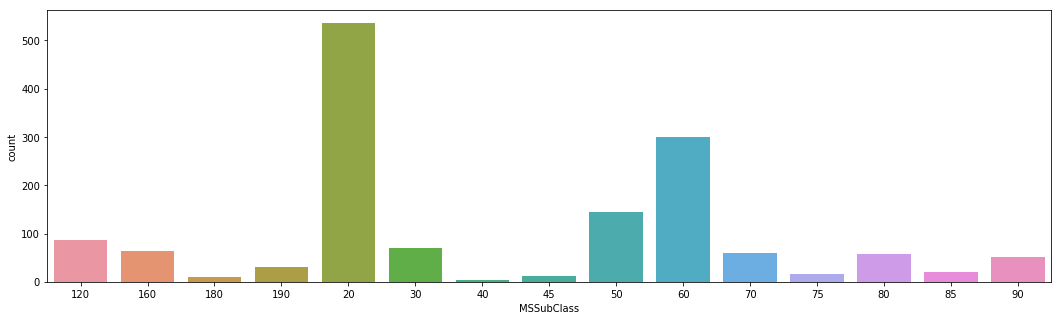

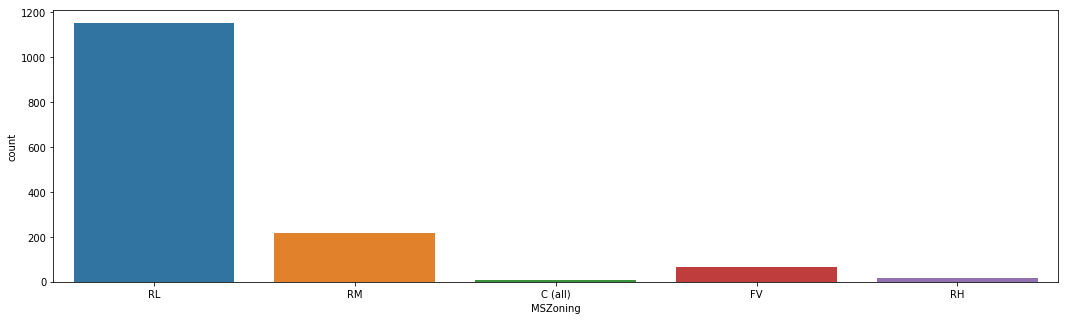

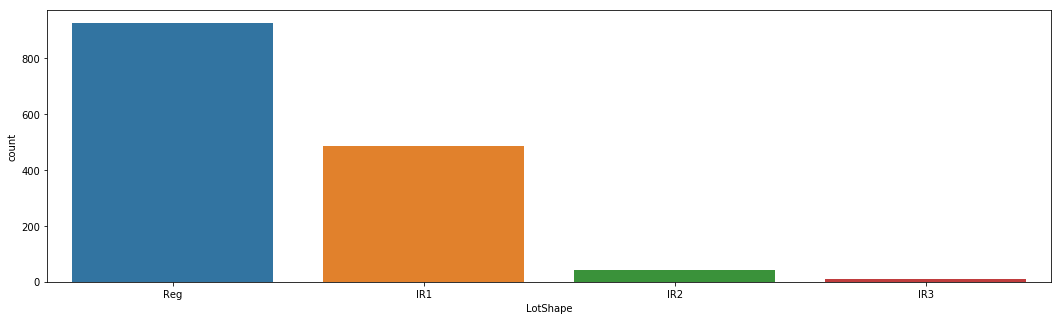

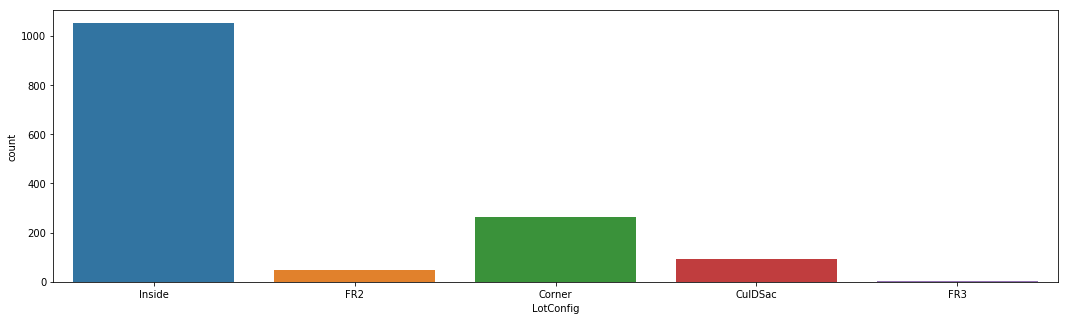

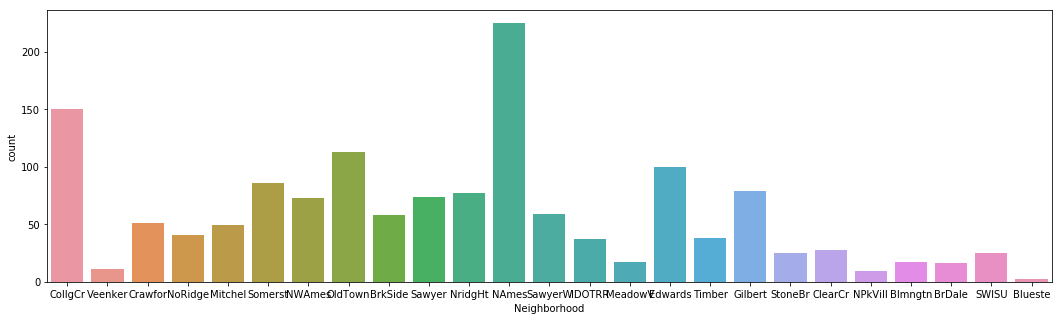

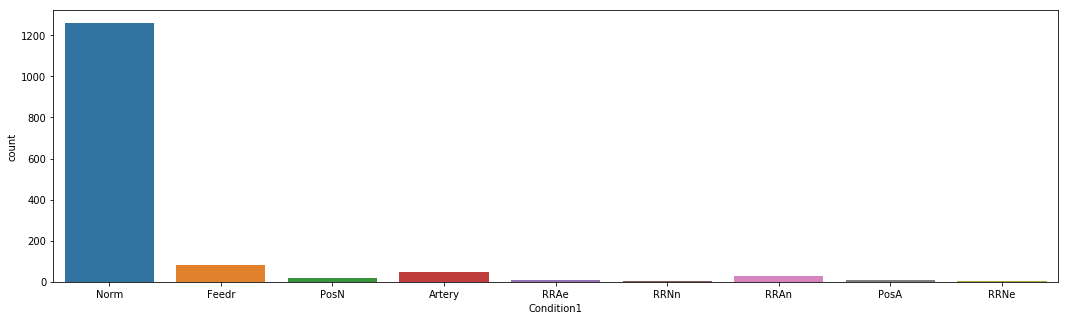

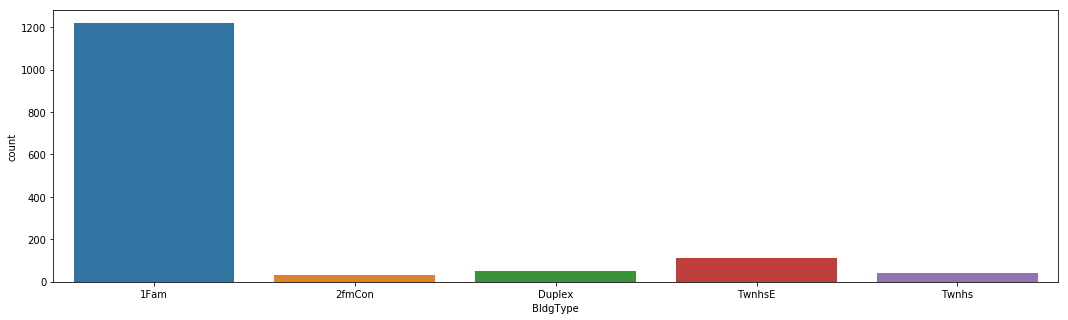

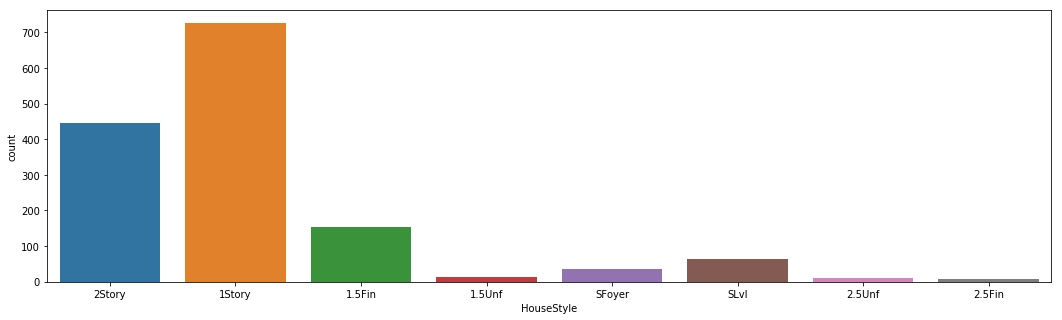

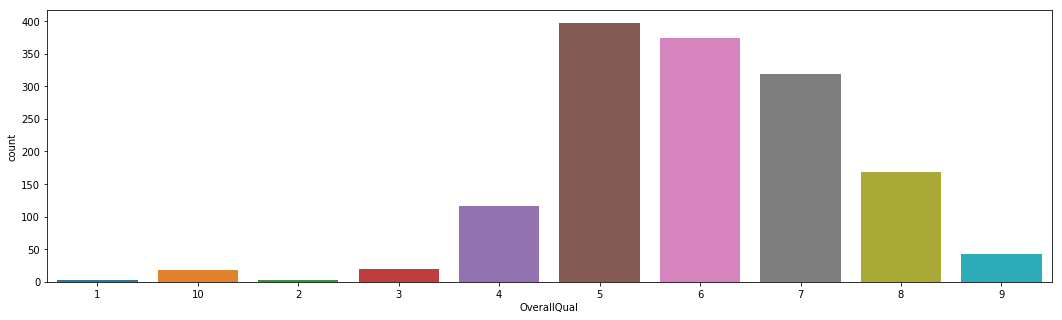

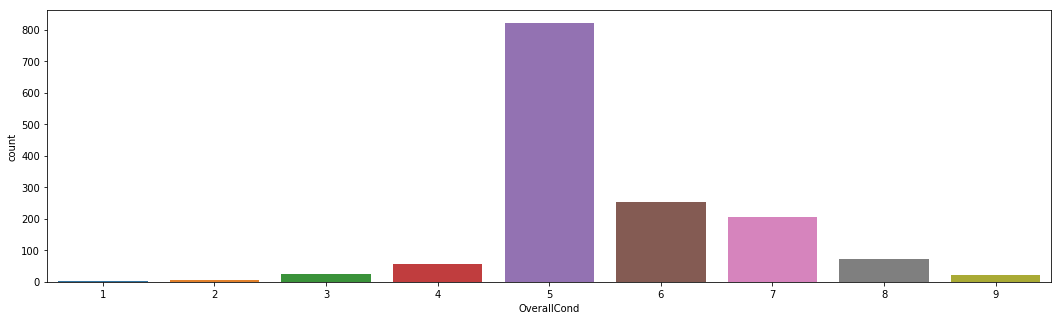

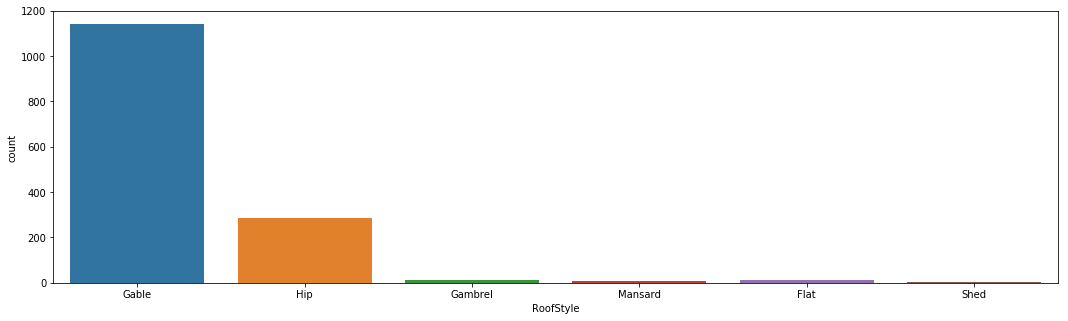

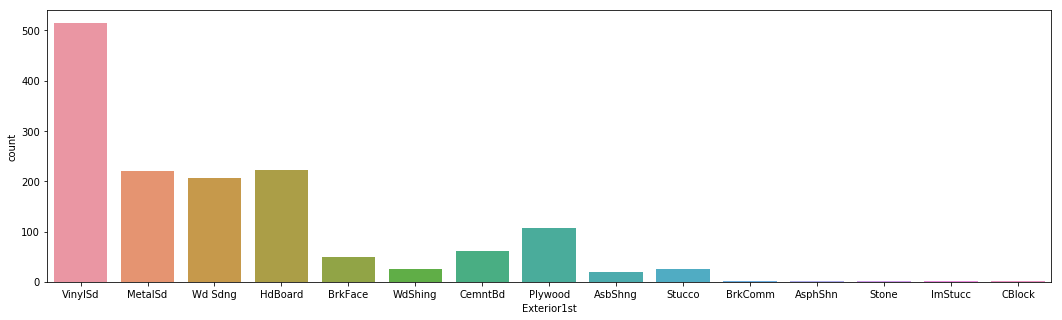

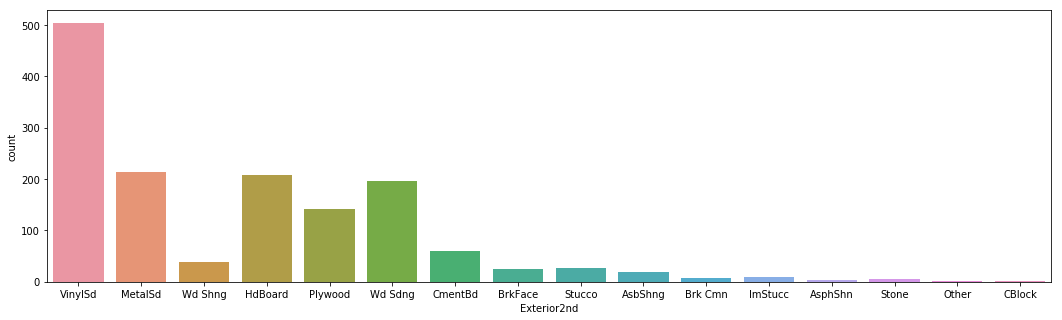

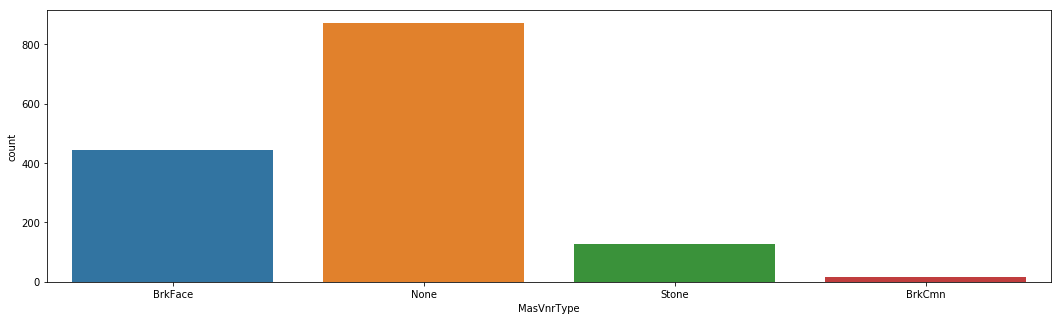

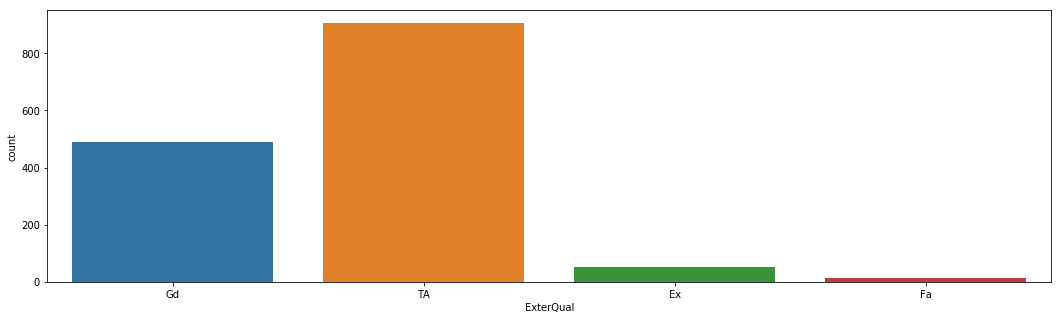

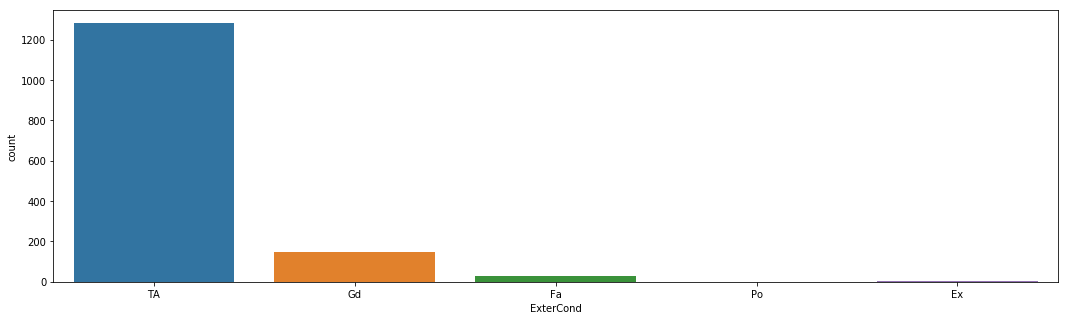

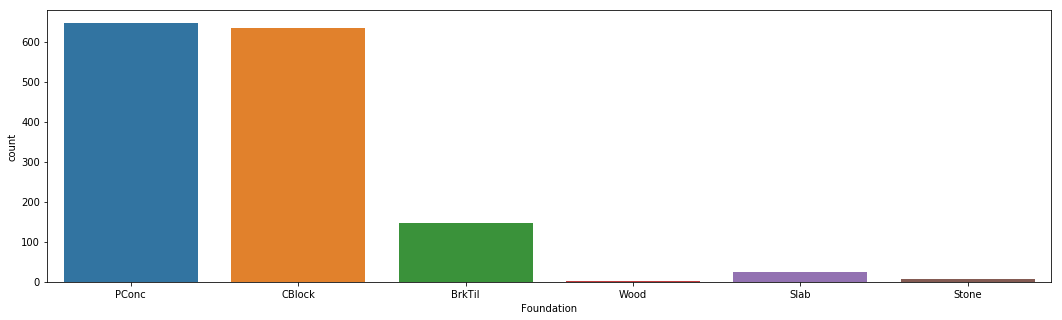

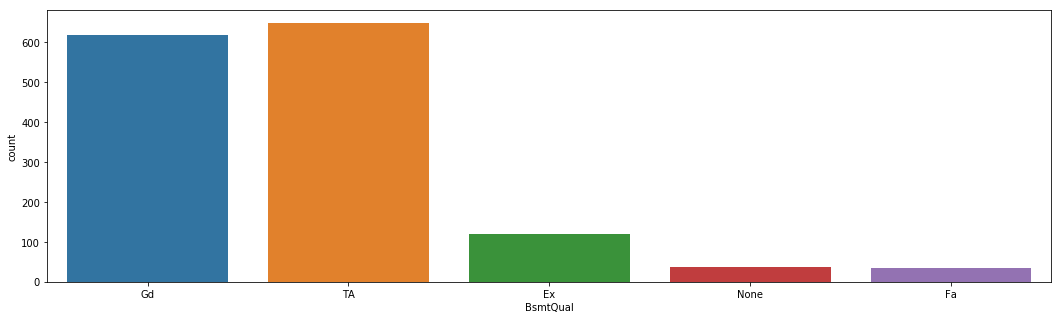

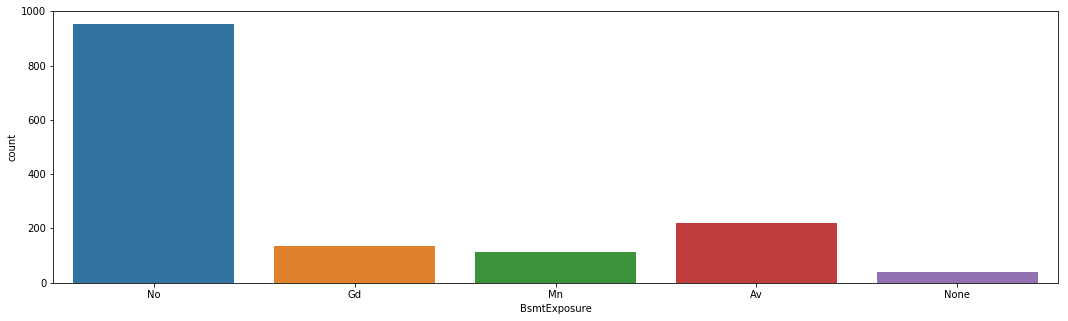

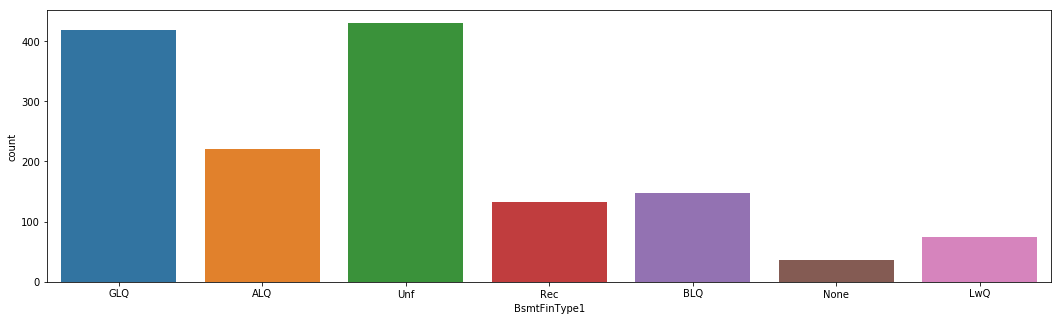

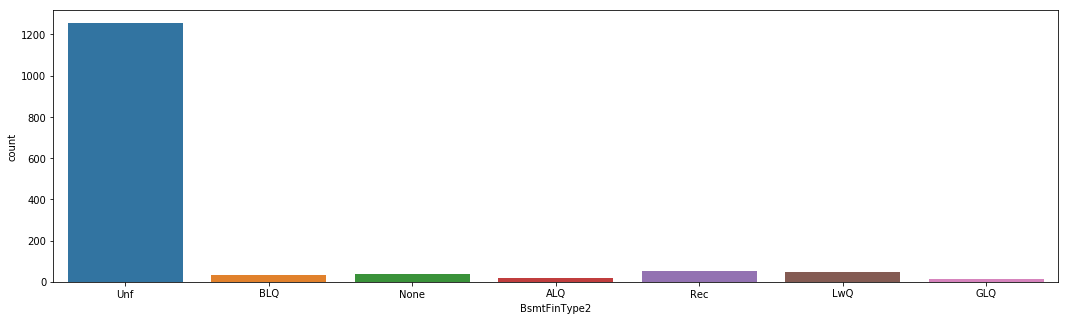

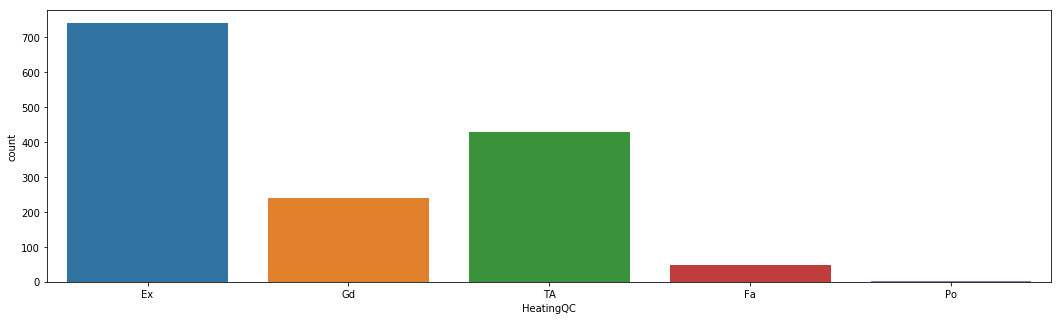

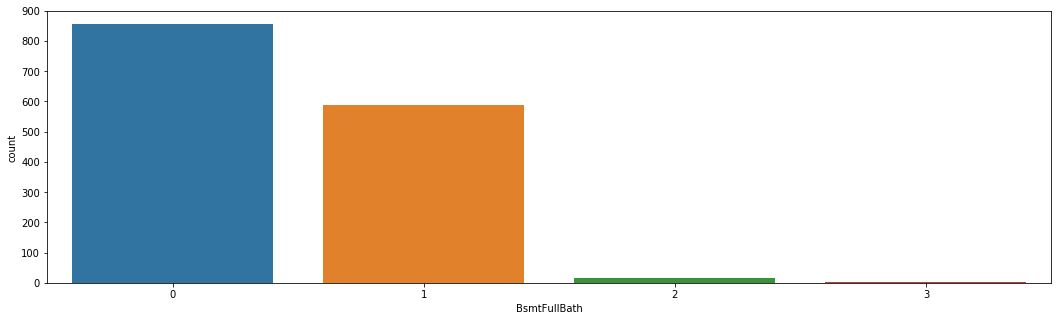

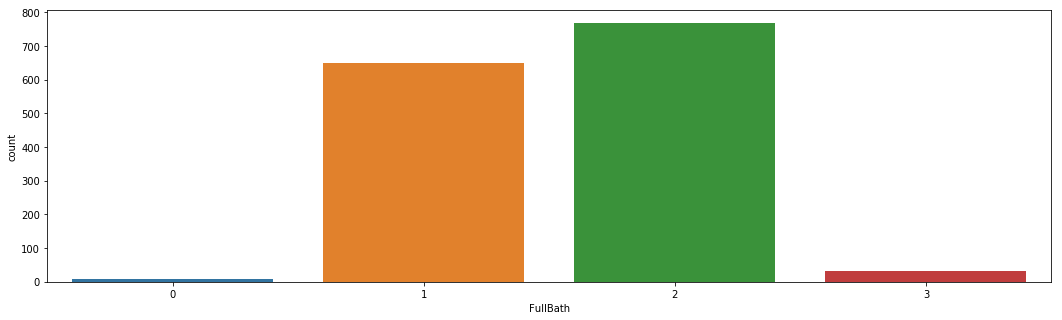

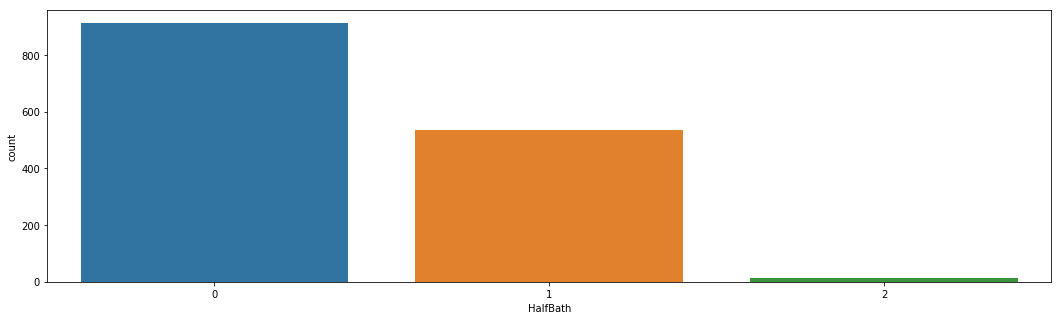

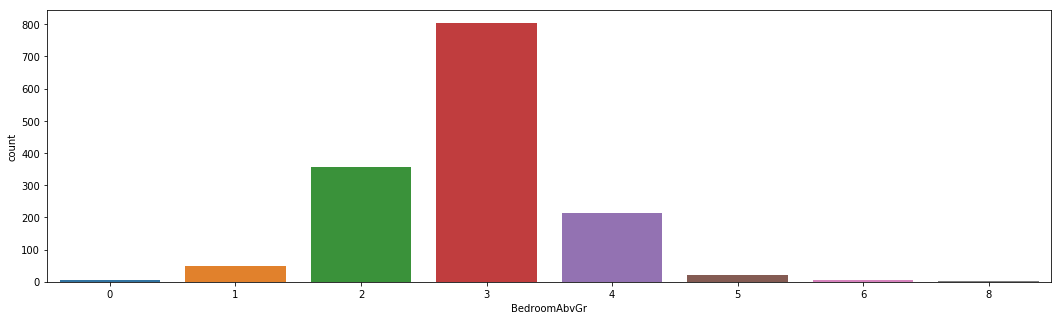

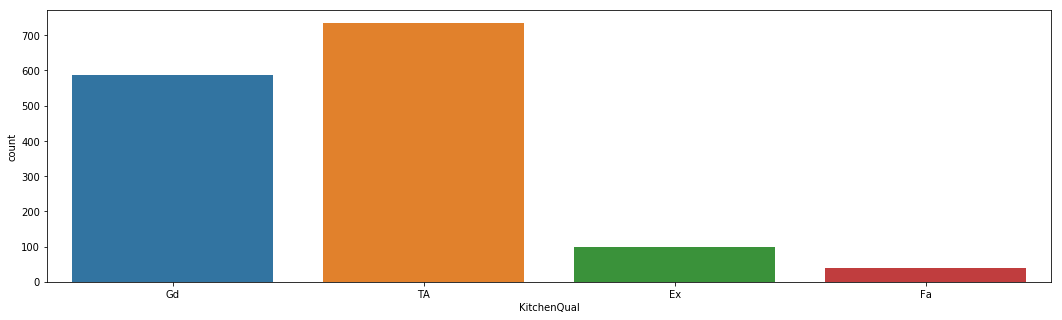

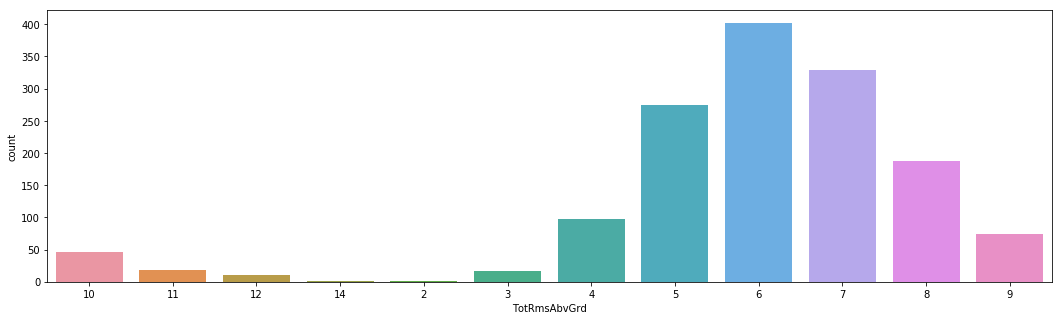

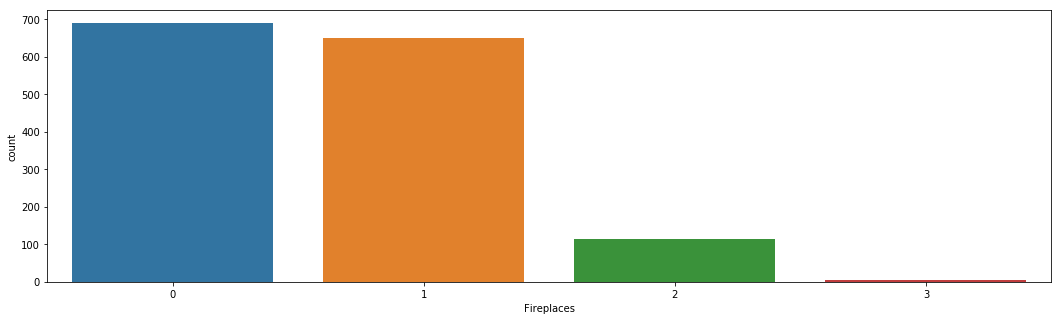

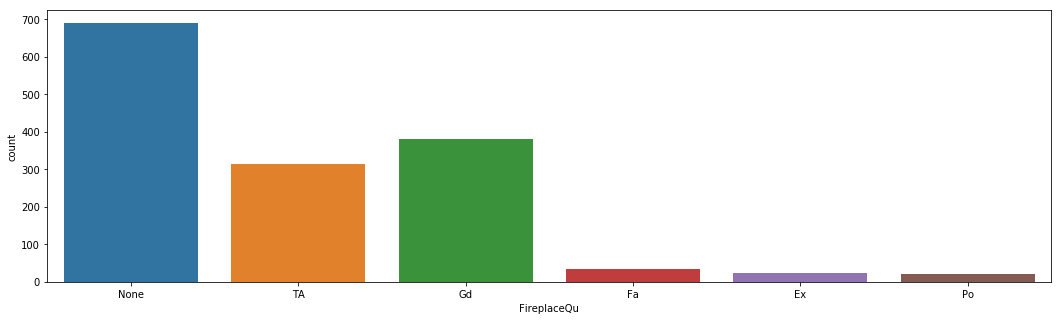

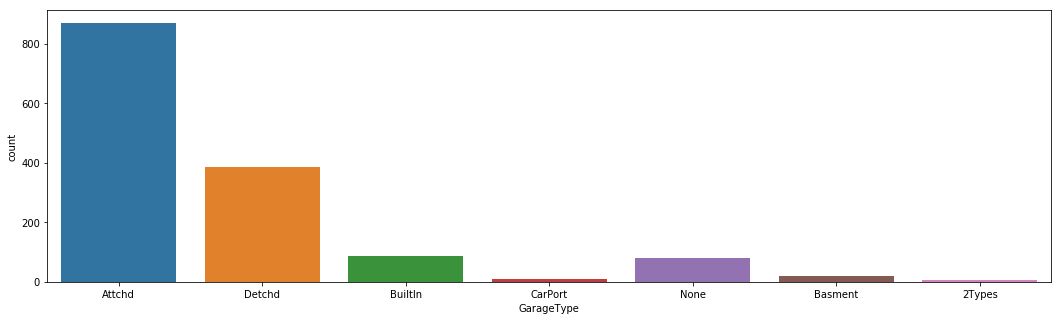

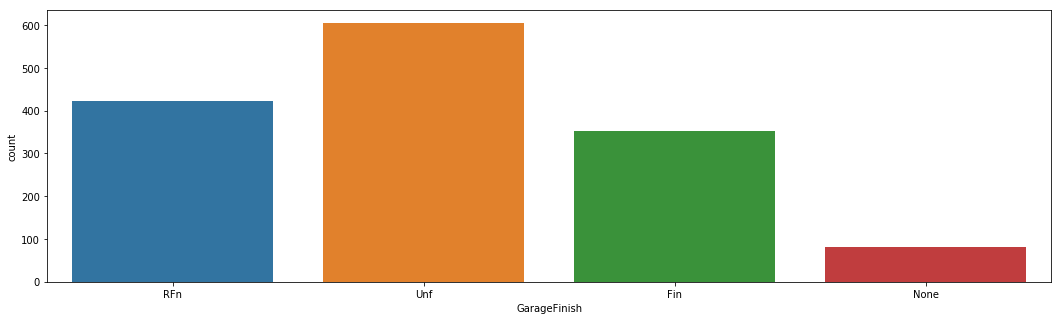

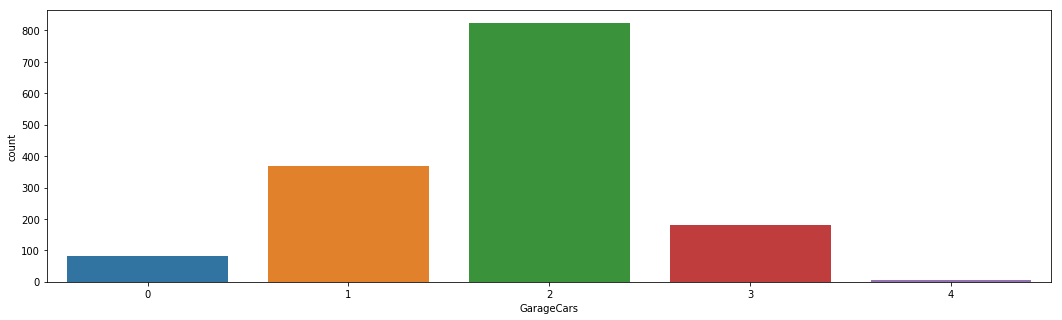

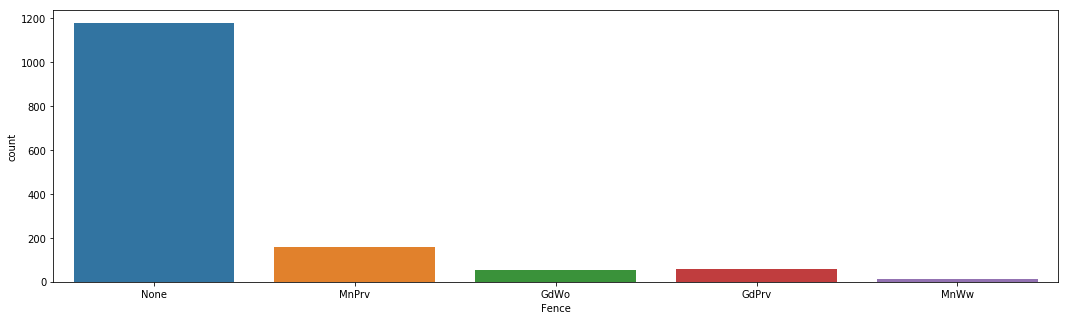

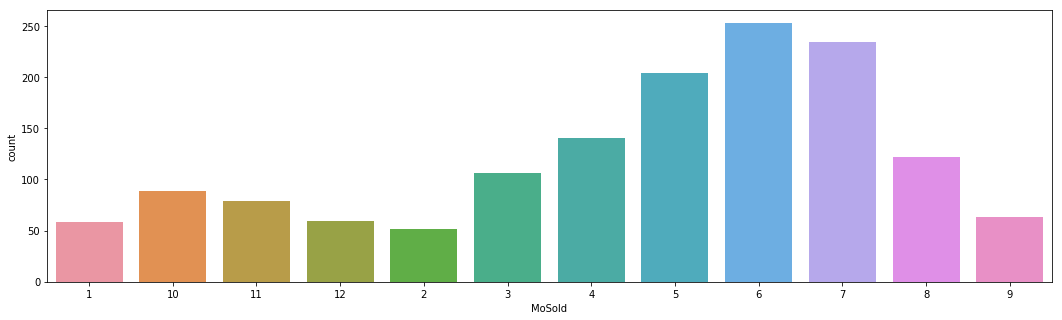

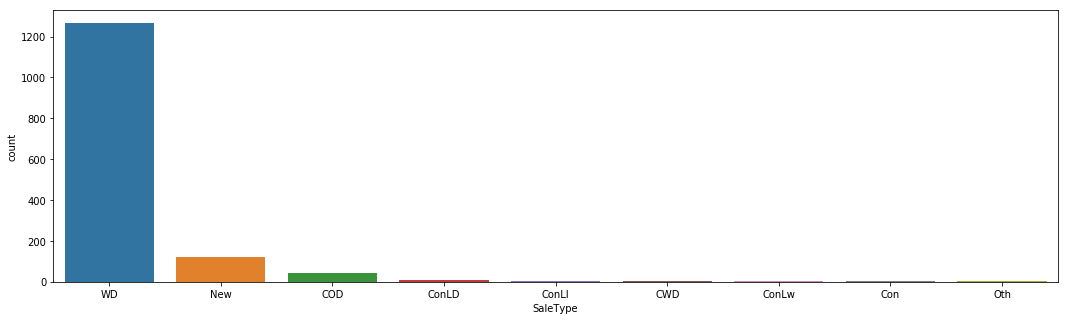

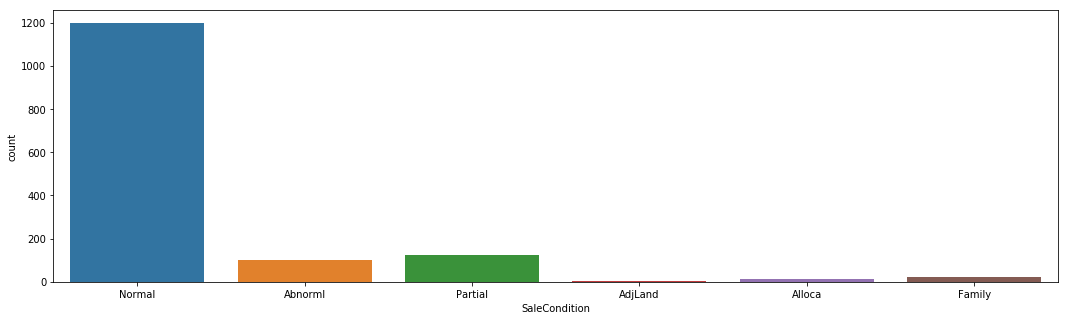

In [33]:
for c in house_cat.columns:
    plt.figure(figsize=(18,5))
    sns.countplot(house_cat[c])
    plt.show()

### 4. Data preparation

In [34]:
# creating dummy variables of the string columns and dropping the first category column
house_dummies = pd.get_dummies(house_cat, drop_first=True)
house_dummies.head()

MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkV

In [35]:
# size of house_dummies
house_dummies.shape

(1460, 236)

In [36]:
# removing the string columns fom the dataset
house = house.drop(list(house_cat.columns), axis=1)
#attaching the dummy variables to the dataset
house = pd.concat([house, house_dummies], axis=1)

In [37]:
house.shape

(1460, 255)

In [38]:
#seperating the dataset to dependant variables dataset X and independant variable y
y = house.pop('SalePrice')
X = house

In [39]:
#storing column names in cols, since column names are lost after scaling
cols = X.columns
#scaling the dataset X
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=254)

In [40]:
# splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 5. Model building and evaluation

### Ridge regression with the whole dataset

In [41]:
# list of values for lambda
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000, 2000 ]}

#creating an instance of the object Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [42]:
#cross validation results for lambda values less than 200
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.129954         0.000000    -22045.811096     -14137.490979   
1       0.009374         0.000000    -22045.172248     -14137.412493   
2       0.009373         0.000000    -22038.841820     -14136.634047   
3       0.010055         0.000404    -22012.166256     -14133.955311   
4       0.005630         0.000000    -21982.135926     -14131.184435   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               30      -21745.357812   
1       0.001   {'alpha': 0.001}               29      -21744.651489   
2        0.01    {'alpha': 0.01}               28      -21737.665135   
3        0.05    {'alpha': 0.05}               27      -21708.176731   
4         0.1     {'alpha': 0.1}               26      -21674.408482   

   split0_train_score  split1_test_score  split1_train_score  \
0       -14971.496484      -21579.513391       -12675.346012   
1       -14971.428460      -21578.482691       -12675.165973   
2       -14970.754245      -21568.282914       -12673.385255   
3       -14967.881183      -21525.658341       -12668.878669   
4       -14964.573604      -21476.871273       -12664.602351   

   split2_test_score  split2_train_score  split3_test_score  \
0      -23044.728302       -13533.728475      -21103.962171   
1      -23043.982800       -13533.641003      -21103.555893   
2      -23036.610621       -13532.770899      -21099.504469   
3      -23005.718231       -13529.159693      -21081.957939   
4      -22970.776977       -13525.281227      -21061.505700   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0       -15204.679988      -22756.966615       -14302.203934      2.228664   
1       -15204.616427      -22756.661510       -14302.210601      0.007654   
2       -15203.982991      -22753.622317       -14302.276844      0.007653   
3       -15201.295448      -22740.810183       -14302.561564      0.000009   
4       -15198.285197      -22728.625665       -14303.179794      0.004657   

   std_score_time  std_test_score  std_train_score  
0        0.000000      734.324464       934.236050  
1        0.000000      734.355759       934.277280  
2        0.000000      734.675479       934.684496  
3        0.000808      736.240514       935.446706  
4        0.000000      738.917364       936.034791

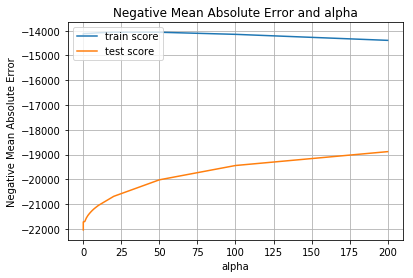

In [43]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid()
plt.show()

In [44]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 500}
-18433.383305359046


### From the above analysis it is clear that the optimum value of lambda for ridge regression is 500

In [45]:
#performing ridge regression for lambda = 500
alpha = 500
ridge1 = Ridge(alpha=alpha)
ridge1.fit(X_train, y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8866841032683255
0.8607851311062937


In [46]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge1.coef_)
model_parameters.insert(0, ridge1.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train.columns
col = col.insert(0, "constant")
sorted(list(zip(col, model_parameters)), key = lambda x:x[1], reverse = True)


[('constant', 180580.646),
 ('GrLivArea', 7302.776),
 ('OverallQual_9', 7186.418),
 ('OverallQual_10', 5984.518),
 ('FullBath_3', 5737.153),
 ('GarageCars_3', 5485.665),
 ('1stFlrSF', 5360.025),
 ('Neighborhood_NoRidge', 5052.812),
 ('Neighborhood_NridgHt', 4328.302),
 ('2ndFlrSF', 4179.845),
 ('OverallQual_8', 3999.967),
 ('Fireplaces_2', 3981.18),
 ('BsmtExposure_Gd', 3865.255),
 ('TotalBsmtSF', 3534.797),
 ('GarageArea', 3357.38),
 ('Neighborhood_Crawfor', 3211.957),
 ('LotArea', 3123.106),
 ('MasVnrArea', 2952.011),
 ('BsmtFinType1_GLQ', 2945.499),
 ('HalfBath_1', 2817.824),
 ('BsmtFinSF1', 2581.692),
 ('BsmtFullBath_1', 2370.526),
 ('Neighborhood_StoneBr', 2098.406),
 ('OverallCond_7', 1932.495),
 ('Exterior1st_BrkFace', 1869.779),
 ('Neighborhood_Somerst', 1859.98),
 ('BedroomAbvGr_4', 1855.697),
 ('WoodDeckSF', 1835.782),
 ('LotConfig_CulDSac', 1749.258),
 ('Condition1_Norm', 1730.571),
 ('MSSubClass_20', 1652.687),
 ('Foundation_PConc', 1652.528),
 ('OverallCond_9', 1523.219),


### From the coefficients of the ridge regression it is clear that the top 12 predictor variables are 'GrLivArea', 'OverallQual_9', 'OverallQual_10', 'FullBath_3', 'GarageCars_3', '1stFlrSF', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual_8', 'Fireplaces_2', 'BsmtExposure_Gd'

### Lasso regression for the whole dataset

In [47]:
# creating an instance of the object Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [48]:
#cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.181747         0.000000    -22041.366202     -14134.872681   
1       0.146281         0.000200    -22041.112575     -14134.867209   
2       0.135245         0.000000    -22038.576280     -14134.813081   
3       0.197738         0.000000    -22027.298551     -14134.583994   
4       0.148000         0.000199    -22022.562273     -14134.304405   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               30      -21699.615910   
1       0.001   {'alpha': 0.001}               29      -21699.568670   
2        0.01    {'alpha': 0.01}               28      -21699.096129   
3        0.05    {'alpha': 0.05}               27      -21696.978116   
4         0.1     {'alpha': 0.1}               26      -21694.306155   

   split0_train_score  split1_test_score  split1_train_score  \
0       -14968.654995      -21511.378456       -12667.125273   
1       -14968.645791      -21511.327913       -12667.120323   
2       -14968.554372      -21510.822492       -12667.070824   
3       -14968.161721      -21508.565779       -12666.852500   
4       -14967.690419      -21505.748191       -12666.580218   

   split2_test_score  split2_train_score  split3_test_score  \
0      -22963.279684       -13529.295849      -21116.949429   
1      -22963.245508       -13529.290702      -21116.895246   
2      -22962.903773       -13529.239242      -21116.353503   
3      -22961.385687       -13529.010679      -21113.948689   
4      -22959.470473       -13528.722579      -21110.945343   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0       -15205.138644      -22917.282779       -14304.148644      0.077076   
1       -15205.132743      -22916.199771       -14304.146487      0.018225   
2       -15205.074775      -22905.369624       -14304.126192      0.012921   
3       -15204.828187      -22857.233700       -14304.066884      0.058209   
4       -15204.533361      -22843.950301       -14303.995447      0.004446   

   std_score_time  std_test_score  std_train_score  
0        0.000000      757.250626       937.050936  
1        0.000399      757.016655       937.050088  
2        0.000000      754.685461       937.042002  
3        0.000000      744.517569       937.011600  
4        0.000399      742.454795       936.980358

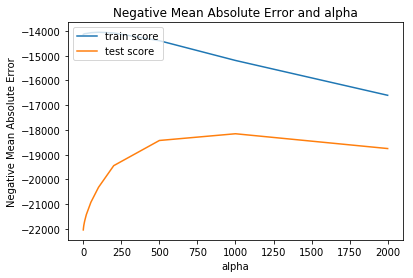

In [49]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [50]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1000}
-18153.319250049586


###  From the above analysis it is clear that the optimum value of lambda for lasso regression is 1000

In [51]:
#performing lasso regression for lambda = 1000
alpha = 1000
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train, y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8876658619147766
0.8546945210013748


In [52]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso1.coef_)
model_parameters.insert(0, lasso1.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train.columns
col = col.insert(0, "constant")
sorted(list(zip(col, model_parameters)), key = lambda x:x[1], reverse = True)

[('constant', 180504.691),
 ('GrLivArea', 25346.767),
 ('OverallQual_9', 13549.991),
 ('OverallQual_8', 8999.321),
 ('OverallQual_10', 8983.892),
 ('GarageCars_3', 7113.861),
 ('FullBath_3', 5976.271),
 ('Neighborhood_NoRidge', 5448.901),
 ('Neighborhood_NridgHt', 5098.085),
 ('BsmtExposure_Gd', 4654.518),
 ('Neighborhood_Crawfor', 4461.248),
 ('MSSubClass_20', 4016.026),
 ('Fireplaces_2', 3727.417),
 ('OverallQual_7', 3412.418),
 ('BsmtFinType1_GLQ', 3166.391),
 ('LotArea', 3060.344),
 ('BsmtFullBath_1', 2902.856),
 ('Neighborhood_Somerst', 2825.044),
 ('GarageArea', 2627.542),
 ('SaleType_New', 2288.445),
 ('Exterior1st_BrkFace', 2210.159),
 ('HalfBath_1', 2094.628),
 ('Condition1_Norm', 2006.528),
 ('TotalBsmtSF', 1715.613),
 ('LotConfig_CulDSac', 1562.228),
 ('GarageType_Attchd', 1405.267),
 ('OverallCond_7', 1377.204),
 ('Neighborhood_StoneBr', 1272.559),
 ('MSZoning_RL', 1074.466),
 ('WoodDeckSF', 941.932),
 ('MoSold_7', 842.277),
 ('Neighborhood_Veenker', 836.141),
 ('Neighborho

### From the coefficients of the lasso regression it is clear that the top 12 predictor variables are 'GrLivArea', 'OverallQual_9', 'OverallQual_8', 'OverallQual_10', 'GarageCars_3', 'house_age', 'FullBath_3', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'remod_age', 'TotRmsAbvGrd_11', 'BsmtExposure_Gd'

### Model building using the top features from ridge and lasso regression

In [53]:
feat = ['GrLivArea','OverallQual_9','OverallQual_10','OverallQual_8','FullBath_3','GarageCars_3','Neighborhood_NoRidge',
        'Neighborhood_NridgHt','BsmtExposure_Gd','1stFlrSF','2ndFlrSF','Fireplaces_2','house_age','remod_age','TotRmsAbvGrd_11']

#### Ridge regression

In [54]:
#performing ridge regression for lambda = 500
alpha = 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[feat], y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge.predict(X_train[feat])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test[feat])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8083459707954423
0.7838573575426804


In [55]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[feat].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 179897.04),
 ('GrLivArea', 13721.464),
 ('OverallQual_9', 9452.251),
 ('OverallQual_10', 7012.497),
 ('OverallQual_8', 8585.594),
 ('FullBath_3', 5135.435),
 ('GarageCars_3', 10070.238),
 ('Neighborhood_NoRidge', 6981.062),
 ('Neighborhood_NridgHt', 6034.279),
 ('BsmtExposure_Gd', 6357.189),
 ('1stFlrSF', 11913.902),
 ('2ndFlrSF', 6430.245),
 ('Fireplaces_2', 6870.076),
 ('house_age', -12023.025),
 ('remod_age', -9836.0),
 ('TotRmsAbvGrd_11', -2538.917)]

#### Lasso regression

In [56]:
#performing ridge regression for lambda = 1000
alpha = 1000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[feat], y_train) 
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso.predict(X_train[feat])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[feat])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8223696917626161
0.8035625995250653


In [57]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[feat].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 179947.239),
 ('GrLivArea', 25428.825),
 ('OverallQual_9', 12883.522),
 ('OverallQual_10', 7875.06),
 ('OverallQual_8', 9987.985),
 ('FullBath_3', 4853.219),
 ('GarageCars_3', 10287.803),
 ('Neighborhood_NoRidge', 6515.965),
 ('Neighborhood_NridgHt', 4547.274),
 ('BsmtExposure_Gd', 6357.246),
 ('1stFlrSF', 6423.837),
 ('2ndFlrSF', 0.0),
 ('Fireplaces_2', 8583.608),
 ('house_age', -15251.211),
 ('remod_age', -10156.477),
 ('TotRmsAbvGrd_11', -4482.257)]

#### Peforming OLS regression to find out the significance of the variables

In [58]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[feat])

# Creating the fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     314.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:29:04   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                    1005   BIC:                         2.426e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.799e+05 

In [59]:
# Checking the VIF values of the model columns
vif = pd.DataFrame()
vif['Features'] = X_train[feat].columns
vif['VIF'] = [variance_inflation_factor(X_train[feat].values, i) for i in range(X_train[feat].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0              GrLivArea  127.42
10              2ndFlrSF   87.31
9               1stFlrSF   73.63
12             house_age    1.76
5           GarageCars_3    1.72
13             remod_age    1.67
3          OverallQual_8    1.58
1          OverallQual_9    1.49
2         OverallQual_10    1.49
7   Neighborhood_NridgHt    1.44
6   Neighborhood_NoRidge    1.30
4             FullBath_3    1.28
8        BsmtExposure_Gd    1.18
14       TotRmsAbvGrd_11    1.14
11          Fireplaces_2    1.10

#### Removing the column GrLivArea as it has a high p-value and VIF value

In [60]:
feat.remove('GrLivArea')

In [61]:
#performing ridge regression for lambda = 500 after removing the unwanted variable
alpha = 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[feat], y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge.predict(X_train[feat])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test[feat])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7976087960977661
0.7658009182653266


In [62]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[feat].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 179907.002),
 ('OverallQual_9', 9844.177),
 ('OverallQual_10', 8021.139),
 ('OverallQual_8', 9345.041),
 ('FullBath_3', 6098.089),
 ('GarageCars_3', 10808.216),
 ('Neighborhood_NoRidge', 7986.033),
 ('Neighborhood_NridgHt', 6122.869),
 ('BsmtExposure_Gd', 6495.655),
 ('1stFlrSF', 17001.032),
 ('2ndFlrSF', 12630.736),
 ('Fireplaces_2', 7473.973),
 ('house_age', -12072.564),
 ('remod_age', -10476.801),
 ('TotRmsAbvGrd_11', -1726.139)]

In [63]:
#performing lasso regression for lambda = 1000
alpha = 1000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[feat], y_train) 
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso.predict(X_train[feat])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[feat])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8230473571126153
0.8020145959451259


In [64]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[feat].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 179950.529),
 ('OverallQual_9', 12948.558),
 ('OverallQual_10', 7948.357),
 ('OverallQual_8', 10159.56),
 ('FullBath_3', 5065.275),
 ('GarageCars_3', 10278.68),
 ('Neighborhood_NoRidge', 6625.647),
 ('Neighborhood_NridgHt', 4538.096),
 ('BsmtExposure_Gd', 6282.544),
 ('1stFlrSF', 24955.831),
 ('2ndFlrSF', 20561.44),
 ('Fireplaces_2', 8520.694),
 ('house_age', -14705.713),
 ('remod_age', -10339.1),
 ('TotRmsAbvGrd_11', -4262.585)]

#### Peforming OLS regression to find out the significance of the variables

In [65]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[feat])

# Creating the fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     337.2
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:29:04   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                    1006   BIC:                         2.426e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.799e+05 

In [66]:
# Checking the VIF values of the model columns
vif = pd.DataFrame()
vif['Features'] = X_train[feat].columns
vif['VIF'] = [variance_inflation_factor(X_train[feat].values, i) for i in range(X_train[feat].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4           GarageCars_3  1.72
8               1stFlrSF  1.72
11             house_age  1.71
12             remod_age  1.67
2          OverallQual_8  1.58
0          OverallQual_9  1.49
1         OverallQual_10  1.49
9               2ndFlrSF  1.47
6   Neighborhood_NridgHt  1.44
5   Neighborhood_NoRidge  1.30
3             FullBath_3  1.28
7        BsmtExposure_Gd  1.18
13       TotRmsAbvGrd_11  1.14
10          Fireplaces_2  1.10

### Since all the columns have low p-value and VIF, performing forward feature selection to select the top 10 predictor variables

In [67]:
#function to calculate AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic
#function to calculate BIC
def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

In [68]:
features = feat

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GarageCars_3'] 
AIC:  22546.335780812173 
BIC:  22556.192856448502
Selected features:  ['GarageCars_3', '1stFlrSF'] 
AIC:  22302.293242873253 
BIC:  22317.078856327746
Selected features:  ['GarageCars_3', '1stFlrSF', '2ndFlrSF'] 
AIC:  21882.860651462775 
BIC:  21902.574802735435
Selected features:  ['GarageCars_3', '1stFlrSF', '2ndFlrSF', 'house_age'] 
AIC:  21676.74012661182 
BIC:  21701.382815702644
Selected features:  ['GarageCars_3', '1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9'] 
AIC:  21559.984327747854 
BIC:  21589.555554656843
Selected features:  ['GarageCars_3', '1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9', 'OverallQual_10'] 
AIC:  21489.244158522255 
BIC:  21523.743923249407
Selected features:  ['GarageCars_3', '1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8'] 
AIC:  21420.83171438217 
BIC:  21460.26001692749
Selected features:  ['GarageCars_3', '1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9', '

### Therefore the top 10 predictor variables are 'GarageCars_3', '1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8', 'Fireplaces_2', 'remod_age', 'BsmtExposure_Gd'

In [69]:
# creating the list of features for building subsequent models
features = ['GarageCars_3', '1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8', 
            'Fireplaces_2', 'remod_age', 'BsmtExposure_Gd']

In [70]:
#performing ridge regression for lambda = 500
alpha = 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[features], y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge.predict(X_train[features])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test[features])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7780504242907569
0.773164230062685


In [71]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[features].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 180330.508),
 ('GarageCars_3', 12827.711),
 ('1stFlrSF', 18304.015),
 ('2ndFlrSF', 14740.336),
 ('house_age', -12819.617),
 ('OverallQual_9', 11061.172),
 ('OverallQual_10', 9974.549),
 ('OverallQual_8', 10993.896),
 ('Fireplaces_2', 7417.594),
 ('remod_age', -10909.017),
 ('BsmtExposure_Gd', 6479.217)]

In [72]:
#performing lasso regression for lambda = 1000
alpha = 1000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[features], y_train) 
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso.predict(X_train[features])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[features])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8068156222914811
0.8174006623859751


In [73]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[features].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 180345.743),
 ('GarageCars_3', 12027.713),
 ('1stFlrSF', 25952.35),
 ('2ndFlrSF', 22575.767),
 ('house_age', -15672.336),
 ('OverallQual_9', 14094.099),
 ('OverallQual_10', 10111.713),
 ('OverallQual_8', 12072.32),
 ('Fireplaces_2', 8158.011),
 ('remod_age', -10149.382),
 ('BsmtExposure_Gd', 6109.939)]

#### Peforming OLS regression to find out the significance of the variables

In [74]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[features])

# Creating the fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:29:06   Log-Likelihood:                -12122.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                    1010   BIC:                         2.432e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.803e+05   1092.477    1

In [75]:
# Checking the VIF values of the model columns
vif = pd.DataFrame()
vif['Features'] = X_train[features].columns
vif['VIF'] = [variance_inflation_factor(X_train[features].values, i) for i in range(X_train[features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3        house_age  1.68
0     GarageCars_3  1.65
1         1stFlrSF  1.65
8        remod_age  1.65
6    OverallQual_8  1.51
5   OverallQual_10  1.38
4    OverallQual_9  1.31
2         2ndFlrSF  1.23
9  BsmtExposure_Gd  1.17
7     Fireplaces_2  1.10

### Since the r2score is higher for lasso, selecting lasso as the final model with the top 10 predictor variables being '1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9', 'OverallQual_8', 'GarageCars_3', 'remod_age', 'OverallQual_10', 'Fireplaces_2' and 'BsmtExposure_Gd'

#### Residue analysis

Text(0.5,0,'Errors')

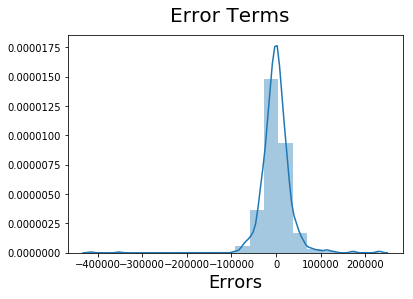

In [76]:
y_train_cnt = y_train_pred
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                 

Text(0,0.5,'y_pred')

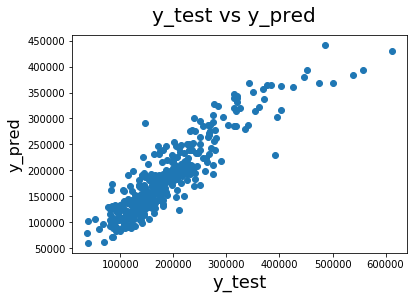

In [77]:
# Plotting actual vs predicted values to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

#### Therefore from the above analysis, the top 10 features are 1stFlrSF, 2ndFlrSF, house_age, OverallQual_9, OverallQual_8, GarageCars_3, remod_age, OverallQual_10, Fireplaces_2, BsmtExposure_Gd

## Part 2: Models for double the optimum value

#### Ridge regression

In [78]:
#performing ridge regression for lambda = 1000
alpha = 1000
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8670106610943973
0.8497679460574916


In [79]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge2.coef_)
model_parameters.insert(0, ridge2.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train.columns
col = col.insert(0, "constant")
sorted(list(zip(col, model_parameters)), key = lambda x:x[1], reverse = True)

[('constant', 180604.758),
 ('GrLivArea', 6141.896),
 ('OverallQual_9', 5613.252),
 ('OverallQual_10', 5167.421),
 ('GarageCars_3', 5034.948),
 ('FullBath_3', 4794.803),
 ('1stFlrSF', 4790.979),
 ('Neighborhood_NoRidge', 4389.246),
 ('Neighborhood_NridgHt', 3701.502),
 ('TotalBsmtSF', 3666.55),
 ('GarageArea', 3518.74),
 ('Fireplaces_2', 3479.049),
 ('BsmtExposure_Gd', 3469.793),
 ('OverallQual_8', 3322.986),
 ('2ndFlrSF', 3228.976),
 ('MasVnrArea', 2976.803),
 ('BsmtFinType1_GLQ', 2763.713),
 ('BsmtFinSF1', 2667.552),
 ('LotArea', 2559.489),
 ('HalfBath_1', 2490.047),
 ('Neighborhood_Crawfor', 2433.793),
 ('BsmtFullBath_1', 2089.176),
 ('WoodDeckSF', 1929.251),
 ('BedroomAbvGr_4', 1746.351),
 ('Foundation_PConc', 1640.059),
 ('Neighborhood_StoneBr', 1575.607),
 ('Exterior1st_BrkFace', 1514.481),
 ('LotConfig_CulDSac', 1502.926),
 ('Condition1_Norm', 1466.048),
 ('SaleType_New', 1349.436),
 ('SaleCondition_Partial', 1334.641),
 ('OverallCond_7', 1302.347),
 ('GarageType_Attchd', 1290.7

#### Lasso regression

In [80]:
#performing lasso regression for lambda = 2000
alpha = 2000
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8677395455332977
0.8458947263337171


In [81]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso2.coef_)
model_parameters.insert(0, lasso2.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train.columns
col = col.insert(0, "constant")
sorted(list(zip(col, model_parameters)), key = lambda x:x[1], reverse = True)

[('constant', 180462.775),
 ('GrLivArea', 23902.26),
 ('OverallQual_9', 12189.68),
 ('OverallQual_10', 7992.802),
 ('OverallQual_8', 7953.155),
 ('GarageCars_3', 7609.623),
 ('FullBath_3', 5248.134),
 ('Neighborhood_NoRidge', 5040.668),
 ('BsmtExposure_Gd', 4523.785),
 ('Neighborhood_NridgHt', 4039.725),
 ('GarageArea', 3938.94),
 ('TotalBsmtSF', 3809.317),
 ('Fireplaces_2', 3665.847),
 ('Neighborhood_Crawfor', 3629.374),
 ('BsmtFinType1_GLQ', 3567.767),
 ('BsmtFullBath_1', 2504.289),
 ('LotArea', 2445.234),
 ('GarageType_Attchd', 2377.32),
 ('MSSubClass_20', 2124.579),
 ('OverallQual_7', 2107.55),
 ('Condition1_Norm', 1975.486),
 ('HalfBath_1', 1600.688),
 ('SaleType_New', 1574.679),
 ('Exterior1st_BrkFace', 1342.4),
 ('LotConfig_CulDSac', 1267.967),
 ('OverallCond_7', 872.669),
 ('Neighborhood_Somerst', 851.412),
 ('WoodDeckSF', 577.414),
 ('BsmtFinSF1', 435.165),
 ('Neighborhood_Veenker', 365.869),
 ('MasVnrArea', 358.806),
 ('LotFrontage', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF'

#### From the coefficients of ridge and lasso regression it is clear that the top 14 predictor variables are 'GrLivArea','OverallQual_9','OverallQual_10','OverallQual_8','FullBath_3','GarageCars_3','Neighborhood_NoRidge','Neighborhood_NridgHt','BsmtExposure_Gd','1stFlrSF','Fireplaces_2','remod_age','TotalBsmtSF' and 'GarageArea'

In [82]:
# creating the list of features for building subsequent models
featd = ['GrLivArea','OverallQual_9','OverallQual_10','OverallQual_8','FullBath_3','GarageCars_3','Neighborhood_NoRidge',
        'Neighborhood_NridgHt','BsmtExposure_Gd','1stFlrSF','Fireplaces_2','remod_age','TotalBsmtSF','GarageArea']

In [83]:
#performing ridge regression for lambda = 1000
alpha = 1000
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[featd], y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge.predict(X_train[featd])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test[featd])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7655951347598657
0.7472494686499352


In [84]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[featd].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 179934.375),
 ('GrLivArea', 12509.308),
 ('OverallQual_9', 7381.331),
 ('OverallQual_10', 5726.609),
 ('OverallQual_8', 7297.646),
 ('FullBath_3', 4988.772),
 ('GarageCars_3', 8034.285),
 ('Neighborhood_NoRidge', 6958.584),
 ('Neighborhood_NridgHt', 5621.823),
 ('BsmtExposure_Gd', 5063.338),
 ('1stFlrSF', 6462.769),
 ('Fireplaces_2', 5120.768),
 ('remod_age', -10160.675),
 ('TotalBsmtSF', 7429.416),
 ('GarageArea', 8690.066)]

In [85]:
#performing lasso regression for lambda = 2000
alpha = 2000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[featd], y_train) 
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso.predict(X_train[featd])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[featd])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8050597260380081
0.8092058150263968


In [86]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[featd].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 180011.202),
 ('GrLivArea', 22191.33),
 ('OverallQual_9', 12122.253),
 ('OverallQual_10', 6799.172),
 ('OverallQual_8', 9607.722),
 ('FullBath_3', 3514.104),
 ('GarageCars_3', 7288.905),
 ('Neighborhood_NoRidge', 7410.478),
 ('Neighborhood_NridgHt', 4971.734),
 ('BsmtExposure_Gd', 6113.481),
 ('1stFlrSF', 0.0),
 ('Fireplaces_2', 7332.824),
 ('remod_age', -15207.996),
 ('TotalBsmtSF', 9108.47),
 ('GarageArea', 9467.181)]

#### Peforming OLS regression to find out the significance of the variables

In [87]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[featd])

# Creating the fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     303.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:29:08   Log-Likelihood:                -12120.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                    1006   BIC:                         2.434e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

In [88]:
# Checking the VIF values of the model columns
vif = pd.DataFrame()
vif['Features'] = X_train[featd].columns
vif['VIF'] = [variance_inflation_factor(X_train[featd].values, i) for i in range(X_train[featd].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9               1stFlrSF  3.72
12           TotalBsmtSF  3.36
0              GrLivArea  2.13
5           GarageCars_3  1.99
13            GarageArea  1.93
3          OverallQual_8  1.58
2         OverallQual_10  1.52
1          OverallQual_9  1.48
7   Neighborhood_NridgHt  1.43
11             remod_age  1.30
6   Neighborhood_NoRidge  1.28
4             FullBath_3  1.24
8        BsmtExposure_Gd  1.18
10          Fireplaces_2  1.10

#### Removing the column 1stFlrSF as it has a high p-value

In [89]:
featd.remove('1stFlrSF')

In [90]:
#performing ridge regression for lambda = 500
alpha = 1000
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[featd], y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge.predict(X_train[featd])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test[featd])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7645668406669095
0.7465063853579044


In [91]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[featd].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 179999.008),
 ('GrLivArea', 13558.389),
 ('OverallQual_9', 7627.797),
 ('OverallQual_10', 6069.693),
 ('OverallQual_8', 7584.731),
 ('FullBath_3', 5019.78),
 ('GarageCars_3', 8181.287),
 ('Neighborhood_NoRidge', 7008.884),
 ('Neighborhood_NridgHt', 5799.294),
 ('BsmtExposure_Gd', 5453.133),
 ('Fireplaces_2', 5424.705),
 ('remod_age', -10252.222),
 ('TotalBsmtSF', 9464.742),
 ('GarageArea', 9341.908)]

In [92]:
#performing lasso regression for lambda = 2000
alpha = 2000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[featd], y_train) 
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso.predict(X_train[featd])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[featd])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8050592782585572
0.8092047376965854


In [93]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[featd].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 180011.205),
 ('GrLivArea', 22191.232),
 ('OverallQual_9', 12121.866),
 ('OverallQual_10', 6798.798),
 ('OverallQual_8', 9607.265),
 ('FullBath_3', 3514.142),
 ('GarageCars_3', 7288.916),
 ('Neighborhood_NoRidge', 7410.543),
 ('Neighborhood_NridgHt', 4971.786),
 ('BsmtExposure_Gd', 6113.407),
 ('Fireplaces_2', 7332.825),
 ('remod_age', -15208.003),
 ('TotalBsmtSF', 9108.806),
 ('GarageArea', 9467.362)]

#### Peforming OLS regression to find out the significance of the variables

In [94]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[featd])

# Creating the fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     326.6
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:29:09   Log-Likelihood:                -12120.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                    1007   BIC:                         2.434e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

In [95]:
# Checking the VIF values of the model columns
vif = pd.DataFrame()
vif['Features'] = X_train[featd].columns
vif['VIF'] = [variance_inflation_factor(X_train[featd].values, i) for i in range(X_train[featd].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5           GarageCars_3  1.97
12            GarageArea  1.90
0              GrLivArea  1.88
11           TotalBsmtSF  1.72
3          OverallQual_8  1.58
2         OverallQual_10  1.52
1          OverallQual_9  1.48
7   Neighborhood_NridgHt  1.43
10             remod_age  1.29
6   Neighborhood_NoRidge  1.27
4             FullBath_3  1.24
8        BsmtExposure_Gd  1.18
9           Fireplaces_2  1.09

### Since all the columns have low p-value and VIF, performing forward feature selection to select the top 10 predictor variables

In [96]:
features = featd

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  22276.13432463923 
BIC:  22285.99140027556
Selected features:  ['GrLivArea', 'GarageCars_3'] 
AIC:  21968.33421029547 
BIC:  21983.119823749963
Selected features:  ['GrLivArea', 'GarageCars_3', 'remod_age'] 
AIC:  21802.06002010152 
BIC:  21821.774171374178
Selected features:  ['GrLivArea', 'GarageCars_3', 'remod_age', 'TotalBsmtSF'] 
AIC:  21642.38113980141 
BIC:  21667.023828892234
Selected features:  ['GrLivArea', 'GarageCars_3', 'remod_age', 'TotalBsmtSF', 'OverallQual_9'] 
AIC:  21527.94883806389 
BIC:  21557.52006497288
Selected features:  ['GrLivArea', 'GarageCars_3', 'remod_age', 'TotalBsmtSF', 'OverallQual_9', 'OverallQual_10'] 
AIC:  21486.713607473856 
BIC:  21521.213372201008
Selected features:  ['GrLivArea', 'GarageCars_3', 'remod_age', 'TotalBsmtSF', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8'] 
AIC:  21429.59862851066 
BIC:  21469.026931055978
Selected features:  ['GrLivArea', 'GarageCars_3', 'remod_age', 'TotalBsmtSF', 'Ov

#### Therefore the top 10 predictor variables are 'GrLivArea', 'GarageCars_3', 'remod_age', 'TotalBsmtSF', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8',  'GarageArea', 'BsmtExposure_Gd' and 'Neighborhood_NridgHt'

In [97]:
featuresd = ['GrLivArea', 'GarageCars_3', 'remod_age', 'TotalBsmtSF', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8', 
             'GarageArea', 'BsmtExposure_Gd', 'Neighborhood_NridgHt']

In [98]:
#performing ridge regression for lambda = 1000
alpha = 1000
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[featuresd], y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = ridge.predict(X_train[featuresd])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test[featuresd])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7333096906642695
0.7390989317661594


In [99]:
#calculating the ridge regression coefficients and intercept
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[featuresd].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 180091.803),
 ('GrLivArea', 15752.754),
 ('GarageCars_3', 9011.394),
 ('remod_age', -10083.145),
 ('TotalBsmtSF', 9848.206),
 ('OverallQual_9', 7740.148),
 ('OverallQual_10', 7196.162),
 ('OverallQual_8', 8378.511),
 ('GarageArea', 9537.892),
 ('BsmtExposure_Gd', 5863.33),
 ('Neighborhood_NridgHt', 5192.452)]

In [100]:
#performing lasso regression for lambda = 2000
alpha = 2000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[featuresd], y_train) 
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso.predict(X_train[featuresd])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test[featuresd])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7812887130358153
0.8106673250446881


In [101]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[featuresd].columns
col = col.insert(0, "constant")
list(zip(col, model_parameters))

[('constant', 180085.71),
 ('GrLivArea', 26753.561),
 ('GarageCars_3', 8695.227),
 ('remod_age', -14159.031),
 ('TotalBsmtSF', 9184.177),
 ('OverallQual_9', 12729.903),
 ('OverallQual_10', 8234.015),
 ('OverallQual_8', 11209.462),
 ('GarageArea', 8660.884),
 ('BsmtExposure_Gd', 6934.66),
 ('Neighborhood_NridgHt', 3277.274)]

#### Peforming OLS regression to find out the significance of the variables

In [102]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[featuresd])

# Creating the fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     365.9
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:29:10   Log-Likelihood:                -12182.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1010   BIC:                         2.444e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05 

In [103]:
# Checking the VIF values of the model columns
vif = pd.DataFrame()
vif['Features'] = X_train[featuresd].columns
vif['VIF'] = [variance_inflation_factor(X_train[featuresd].values, i) for i in range(X_train[featuresd].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1          GarageCars_3  1.92
7            GarageArea  1.88
3           TotalBsmtSF  1.69
0             GrLivArea  1.60
6         OverallQual_8  1.53
4         OverallQual_9  1.47
5        OverallQual_10  1.44
9  Neighborhood_NridgHt  1.39
2             remod_age  1.26
8       BsmtExposure_Gd  1.15

### Therefore the top 10 predictor variables for lambda double the optimum value are 'GrLivArea', 'remod_age', 'OverallQual_9', 'OverallQual_8', 'TotalBsmtSF', 'GarageCars_3', 'GarageArea', 'OverallQual_10', 'BsmtExposure_Gd' and 'Neighborhood_NridgHt'

### Part 3: Removing the top 5 predictor variables from the dataset

In [104]:
#dropping the top 5 variables from the dataset house and X
house.drop(['1stFlrSF', '2ndFlrSF', 'house_age', 'OverallQual_9', 'OverallQual_8'], axis = 1, inplace = True)
X = house
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          856       1710         548           0           61              0   
1         1262       1262         460         298            0              0   
2          920       1786         608           0           42              0   
3          756       1717         642           0           35            272   
4         1145       2198         836         192           84              0   

   sold_age  garage_age  remod_age  MSSubClass_160  MSSubClass_180  \
0        12        17.0         17               0               0   
1        13        44.0         44               0               0   
2        12        19.0         18               0               0   
3        14        22.0         50               0               0   
4        12        20.0         20               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              0              0              0              0   
1               0              1              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0              0              0            0            0            1   
1              0              0            0            0            1   
2              0              0            0            0            1   
3              0              0            0            0            1   
4              0              0            0            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0            0             0             0             1                  0   
1            0             0             0             1                  0   
2            0             0             0             0                  0   
3            0             0             0             0                  0   
4            0             0             0             0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
0              0              0                 1                     0   
1              1              0                 0                     0   
2              0              0                 1                     0   
3              0              0                 0                     0   
4              1              0                 0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0         

In [105]:
#storing column names in cols, since column names are lost after scaling
cols = X.columns
#scaling X
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=249)

In [106]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#### Lasso regression

In [107]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [108]:
#cross validation details
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.132029         0.000200    -22187.811341     -14408.302637   
1       0.174810         0.000200    -22187.581856     -14408.299463   
2       0.128138         0.000598    -22185.286780     -14408.268528   
3       0.139894         0.000199    -22175.083308     -14408.138560   
4       0.126632         0.000000    -22166.292707     -14407.985929   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               30      -21801.722391   
1       0.001   {'alpha': 0.001}               29      -21801.710815   
2        0.01    {'alpha': 0.01}               28      -21801.594905   
3        0.05    {'alpha': 0.05}               27      -21801.076558   
4         0.1     {'alpha': 0.1}               26      -21800.422267   

   split0_train_score  split1_test_score  split1_train_score  \
0       -15172.994363      -21583.050338       -13010.665552   
1       -15172.991601      -21583.031569       -13010.664066   
2       -15172.965102      -21582.842925       -13010.649450   
3       -15172.865907      -21581.991999       -13010.585636   
4       -15172.778203      -21580.916197       -13010.509058   

   split2_test_score  split2_train_score  split3_test_score  \
0      -23183.568062       -13904.906168      -21420.237178   
1      -23183.541584       -13904.900988      -21420.215510   
2      -23183.276813       -13904.849763      -21419.998840   
3      -23182.100234       -13904.624923      -21419.036269   
4      -23180.629991       -13904.345462      -21417.834628   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0       -15345.628990      -22952.371329       -14607.318115      0.015183   
1       -15345.625245      -22951.301326       -14607.315414      0.063845   
2       -15345.589214      -22940.601260       -14607.289110      0.020835   
3       -15345.440875      -22893.044848       -14607.175461      0.020504   
4       -15345.256917      -22853.453932       -14607.040004      0.014870   

   std_score_time  std_test_score  std_train_score  
0        0.000399      731.868722       861.363885  
1        0.000399      731.647136       861.363543  
2        0.000488      729.441041       861.360511  
3        0.000399      719.853164       861.352354  
4        0.000000      712.173709       861.348011

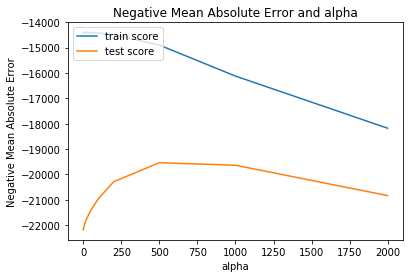

In [109]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
#to get the best lambda value and score of the model
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 500}
-19537.91059893991


In [119]:
#performing lasso regression for lambda = 500
alpha = 500
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train, y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8968376692277165
0.8509384608951485


In [120]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso1.coef_)
model_parameters.insert(0, lasso1.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train.columns
col = col.insert(0, "constant")
sorted(list(zip(col, model_parameters)), key = lambda x:x[1], reverse = True)

[('constant', 180427.084),
 ('GrLivArea', 26103.994),
 ('GarageCars_3', 8150.108),
 ('Neighborhood_NridgHt', 7314.124),
 ('FullBath_3', 6571.222),
 ('Neighborhood_NoRidge', 6356.807),
 ('MSSubClass_20', 5648.192),
 ('BsmtExposure_Gd', 5190.55),
 ('Neighborhood_Somerst', 4861.109),
 ('Fireplaces_2', 4201.284),
 ('Neighborhood_Crawfor', 3822.065),
 ('LotArea', 3628.973),
 ('Neighborhood_StoneBr', 3611.245),
 ('BsmtFinType1_GLQ', 3098.73),
 ('OverallQual_10', 2786.821),
 ('BsmtFullBath_1', 2686.038),
 ('Exterior1st_BrkFace', 2419.907),
 ('SaleType_New', 2291.259),
 ('HalfBath_1', 2126.32),
 ('WoodDeckSF', 1870.463),
 ('Condition1_Norm', 1738.513),
 ('MasVnrArea', 1679.137),
 ('LotConfig_CulDSac', 1624.309),
 ('Exterior2nd_VinylSd', 1607.26),
 ('MSZoning_RL', 1537.924),
 ('MoSold_7', 1486.39),
 ('TotalBsmtSF', 1468.033),
 ('GarageType_Attchd', 1335.181),
 ('Foundation_PConc', 1329.055),
 ('OverallCond_9', 1310.049),
 ('OverallCond_7', 1292.802),
 ('GarageCars_4', 1236.705),
 ('Neighborhood

#### Choosing the top 10 features with forward feature selection

In [121]:
features = X.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  22276.13432463923 
BIC:  22285.99140027556
Selected features:  ['GrLivArea', 'GarageCars_3'] 
AIC:  21968.33421029547 
BIC:  21983.119823749963
Selected features:  ['GrLivArea', 'GarageCars_3', 'BsmtFinSF1'] 
AIC:  21799.114177950167 
BIC:  21818.828329222826
Selected features:  ['GrLivArea', 'GarageCars_3', 'BsmtFinSF1', 'ExterQual_TA'] 
AIC:  21615.93746287977 
BIC:  21640.580151970593
Selected features:  ['GrLivArea', 'GarageCars_3', 'BsmtFinSF1', 'ExterQual_TA', 'remod_age'] 
AIC:  21539.694014811106 
BIC:  21569.265241720095
Selected features:  ['GrLivArea', 'GarageCars_3', 'BsmtFinSF1', 'ExterQual_TA', 'remod_age', 'Neighborhood_NridgHt'] 
AIC:  21473.325514961307 
BIC:  21507.82527968846
Selected features:  ['GrLivArea', 'GarageCars_3', 'BsmtFinSF1', 'ExterQual_TA', 'remod_age', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr'] 
AIC:  21386.247632933464 
BIC:  21425.675935478783
Selected features:  ['GrLivArea', 'GarageCars_3', 'BsmtFinSF1'

#### Therefore the top 10 features are 'GrLivArea', 'GarageCars_3', 'BsmtFinSF1', 'ExterQual_TA', 'remod_age', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'MSSubClass_20', 'OverallCond_4' and 'OverallCond_3'

In [122]:
features = ['GrLivArea', 'GarageCars_3', 'BsmtFinSF1', 'ExterQual_TA', 'remod_age', 'Neighborhood_NridgHt', 
            'Neighborhood_StoneBr', 'MSSubClass_20', 'OverallCond_4', 'OverallCond_3']

In [123]:
#performing lasso regression for lambda = 500
alpha = 500
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train[features], y_train)
#making predictions and calculating the r2 score for train and test sets
y_train_pred = lasso1.predict(X_train[features])
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso1.predict(X_test[features])
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7619791863327473
0.8270922251396876


In [124]:
#calculating the lasso regression coefficients and intercept
model_parameters = list(lasso1.coef_)
model_parameters.insert(0, lasso1.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
col = X_train[features].columns
col = col.insert(0, "constant")
sorted(list(zip(col, model_parameters)), key = lambda x:x[1], reverse = True)

[('constant', 180439.267),
 ('GrLivArea', 36144.571),
 ('GarageCars_3', 17999.055),
 ('BsmtFinSF1', 12004.007),
 ('Neighborhood_NridgHt', 8542.796),
 ('MSSubClass_20', 7945.435),
 ('Neighborhood_StoneBr', 4734.867),
 ('OverallCond_4', -3095.579),
 ('OverallCond_3', -3157.044),
 ('remod_age', -11203.107),
 ('ExterQual_TA', -13140.202)]

#### Peforming OLS regression to find out the significance of the variables

In [125]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[features])

# Creating the fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     323.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          8.39e-307
Time:                        21:39:25   Log-Likelihood:                -12230.
No. Observations:                1021   AIC:                         2.448e+04
Df Residuals:                    1010   BIC:                         2.454e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.804e+05 

In [126]:
# Checking the VIF values of the model columns
vif = pd.DataFrame()
vif['Features'] = X_train[features].columns
vif['VIF'] = [variance_inflation_factor(X_train[features].values, i) for i in range(X_train[features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3          ExterQual_TA  1.78
4             remod_age  1.59
0             GrLivArea  1.49
1          GarageCars_3  1.46
5  Neighborhood_NridgHt  1.24
7         MSSubClass_20  1.19
2            BsmtFinSF1  1.13
8         OverallCond_4  1.05
6  Neighborhood_StoneBr  1.04
9         OverallCond_3  1.03

### Therefore it is clear that the top 10 predictor variables after the removal of the previous features are 'GrLivArea', GarageCars_3, ExterQual_TA',  'BsmtFinSF1', 'remod_age', 'Neighborhood_NridgHt', 'MSSubClass_20', 'Neighborhood_StoneBr', 'OverallCond_3', 'OverallCond_4'